In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

# Analyse des données de systèmes éducatifs

## Partie 1 : Analyse générale des données

### Fichier 1

In [232]:
df = pd.read_csv('files/EdStatsCountry-Series.csv')

In [233]:
df.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [234]:
df.shape

(613, 4)

Le fichier contient fichier 613 lignes et 4 colonnes.

In [235]:
df.isnull().mean()

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

La colonne 'Unnamed: 3' est vide.
Il ne manque aucune donnée dans les autres colonnes

In [236]:
country_series = df

### Fichier 2

In [237]:
df = pd.read_csv('files/EdStatsCountry.csv')

In [238]:
df.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [239]:
df.shape

(241, 32)

Le fichier contient fichier 241 lignes et 32 colonnes.

In [240]:
mean_null_by_columns_df = df.isnull().mean()
mean_null_by_columns_df

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
SNA price valuation                                  0.182573
Lending category                                     0.402490
Other groups                                         0.759336
System of National Accounts                          0.107884
Alternat

In [241]:
columns_with_no_null = mean_null_by_columns_df[mean_null_by_columns_df == 0.0]
columns_with_no_null

Country Code    0.0
Short Name      0.0
Table Name      0.0
Long Name       0.0
dtype: float64

Aucune données n'est manquante dans les colonnes ci-dessus

In [242]:
columns_with_only_null = mean_null_by_columns_df[mean_null_by_columns_df == 1.0]
columns_with_only_null

Unnamed: 31    1.0
dtype: float64

La colonne ci-dessus est vide

In [243]:
countries = df

### Fichier 3

In [244]:
df = pd.read_csv('files/EdStatsData.csv')

In [245]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [246]:
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
df.shape

(886930, 70)

Le fichier contient fichier 886 930 lignes et 70 colonnes.

In [248]:
mean_null_by_columns_df = df.isnull().mean()
mean_null_by_columns_df

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
1971              0.959933
1972              0.959840
1973              0.959924
1974              0.959715
1975              0.901564
1976              0.957738
1977              0.957636
1978              0.957634
1979              0.958498
1980              0.899516
1981              0.956280
1982              0.957707
1983              0.956637
1984              0.956472
1985              0.898193
1986              0.955609
1987              0.956433
1988              0.956533
1989              0.957674
1990              0.859735
1991              0.916073
1992              0.914826
1993              0.914545
1994              0.912663
1995              0.851892
1996              0.913401
1997              0.917183
1998              0.904261
1999              0.866011
2000              0.800801
2001              0.860745
2002              0.859961
2

In [249]:
columns_with_no_null = mean_null_by_columns_df[mean_null_by_columns_df == 0.0]
columns_with_no_null

Country Name      0.0
Country Code      0.0
Indicator Name    0.0
Indicator Code    0.0
dtype: float64

Aucune données n'est manquante dans les colonnes ci-dessus

In [250]:
columns_with_only_null = mean_null_by_columns_df[mean_null_by_columns_df == 1.0]
columns_with_only_null

Unnamed: 69    1.0
dtype: float64

La colonne ci-dessus est vide

In [251]:
stats = df

### Fichier 4

In [252]:
df = pd.read_csv('files/EdStatsFootNote.csv')

In [253]:
df.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [254]:
df.shape

(643638, 5)

Le fichier contient fichier 643 638 lignes et 5 colonnes.

In [255]:
mean_null_by_columns_df = df.isnull().mean()
mean_null_by_columns_df

CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64

In [256]:
columns_with_no_null = mean_null_by_columns_df[mean_null_by_columns_df == 0.0]
columns_with_no_null

CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
dtype: float64

Aucune données n'est manquante dans les colonnes ci-dessus

In [257]:
columns_with_only_null = mean_null_by_columns_df[mean_null_by_columns_df == 1.0]
columns_with_only_null

Unnamed: 4    1.0
dtype: float64

La colonne ci-dessus est vide

In [258]:
foot_note = df

### Fichier 5

In [259]:
df = pd.read_csv('files/EdStatsSeries.csv')

In [260]:
df.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
df.shape

(3665, 21)

Le fichier contient fichier 3 665 lignes et 21 colonnes.

In [262]:
mean_null_by_columns_df = df.isnull().mean()
mean_null_by_columns_df

Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Short definition                       0.411733
Long definition                        0.000000
Unit of measure                        1.000000
Periodicity                            0.972988
Base Period                            0.914325
Other notes                            0.849386
Aggregation method                     0.987176
Limitations and exceptions             0.996180
Notes from original source             1.000000
General comments                       0.996180
Source                                 0.000000
Statistical concept and methodology    0.993724
Development relevance                  0.999181
Related source links                   0.941337
Other web links                        1.000000
Related indicators                     1.000000
License Type                           1.000000
Unnamed: 20                            1

In [263]:
columns_with_no_null = mean_null_by_columns_df[mean_null_by_columns_df == 0.0]
columns_with_no_null

Series Code        0.0
Topic              0.0
Indicator Name     0.0
Long definition    0.0
Source             0.0
dtype: float64

Aucune données n'est manquante dans les colonnes ci-dessus

In [264]:
columns_with_only_null = mean_null_by_columns_df[mean_null_by_columns_df == 1.0]

Les colonnes ci-dessus sont vides

In [265]:
series = df

## Partie 2 : Sélectionnez les données pertinentes

### Données prévisionnelles

In [266]:
df_forecast = stats

In [267]:
# Rename some columns
df_forecast.rename(columns={'Indicator Name' : 'indicator', 'Country Name': 'country'}, inplace = True)

In [268]:
# Delete the last column
df_forecast = df_forecast.iloc[:, :-1]

In [269]:
# Drop duplicated columns (here no columns were duplicated)
print(f"Number of ligns before drop duplicates : {df_forecast.shape[1]}")
df_forecast.drop_duplicates(subset=["country", "indicator"], keep='first')
print(f"Number of ligns after drop duplicates : {df_forecast.shape[1]}")

Number of ligns before drop duplicates : 69
Number of ligns after drop duplicates : 69


In [270]:
# Choose dimensions and years to use for the forecast
df_forecast = df_forecast[['country', 'indicator', "2025", "2030", "2035", "2040"]]

In [271]:
# Regroup all years columns into one
df_forecast = pd.melt(df_forecast, id_vars=['country', 'indicator'], var_name="year", value_name="value")
df_forecast = df_forecast.sort_values(by=['country', 'indicator', 'year']).reset_index(drop=True)
df_forecast.head()

,country,indicator,year,value
0,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2025,NaN
1,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2030,NaN
2,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2035,NaN
3,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2040,NaN
4,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2025,NaN


In [272]:
# Divide all values in indicator column to create new columns
df_forecast = df_forecast.pivot_table(index=['country', 'year'], columns='indicator', values='value', aggfunc='sum').reset_index()
# Renaming columns for clarity
df_forecast.columns.name = None
df_forecast.head()

,country,year,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
0,Afghanistan,2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,2030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Albania,2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,649.76,1302.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [273]:
# Delete all values in the country column that are not countries
non_countries = [
    'Arab World',
    'East Asia & Pacific',
    'East Asia & Pacific (excluding high income)',
    'Euro area',
    'Europe & Central Asia',
    'Europe & Central Asia (excluding high income)',
    'European Union',
    'Heavily indebted poor countries (HIPC)',
    'High income',
    'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Least developed countries: UN classification',
    'Low & middle income',
    'Low income',
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (excluding high income)',
    'Middle income',
    'North America',
    'OECD members',
    'South Asia',
    'Sub-Saharan Africa',
    'Sub-Saharan Africa (excluding high income)',
    'Upper middle income',
    'World'
 ]
df_forecast =  df_forecast[~df_forecast["country"].isin(non_countries)]

In [274]:
# Delete countries with no data

df_forecast_grouped_by_country = df_forecast.groupby(['country']).sum().reset_index()
countries_with_no_data = []

# Iterate over each row in the DataFrame
for index, row in df_forecast_grouped_by_country.iterrows():
    # Check if all indicator columns are 0
    if (row.drop(['country', 'year']) == 0).all():
        countries_with_no_data.append(row['country'])

df_forecast =  df_forecast[~df_forecast["country"].isin(countries_with_no_data)]

In [275]:
# Calculate for each columns the mean of values that equal to 0.
# Sort the result in order to select columns with a rate of 50% or less
zero_proportion = df_forecast.eq(0).mean().sort_values(ascending=True)

zero_proportion[zero_proportion < 0.5].head()

country                                                                                                                               0.0
Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Male        0.0
Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Female      0.0
Wittgenstein Projection: Percentage of the population age 20-64 by highest level of educational attainment. Upper Secondary. Total    0.0
Wittgenstein Projection: Percentage of the population age 20-64 by highest level of educational attainment. Upper Secondary. Male     0.0
dtype: float64

In [276]:
forecast_indicators = [
    'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
    'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',
    'Wittgenstein Projection: Mean years of schooling. Age 25-29. Total',
]
indicators = ['country', 'year'] + forecast_indicators

Voici les indicateurs que j'ai choisis pour analyser les données prévisionnelles.

In [277]:
df_forecast = df_forecast[indicators]

In [278]:
# Rename indicators
df_forecast.rename(columns = {
    'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total':'mean_years_school_15_19',
    'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total':'mean_years_school_20_24',
    'Wittgenstein Projection: Mean years of schooling. Age 25-29. Total':'mean_years_school_25_29',
    }, inplace = True)


<Axes: >

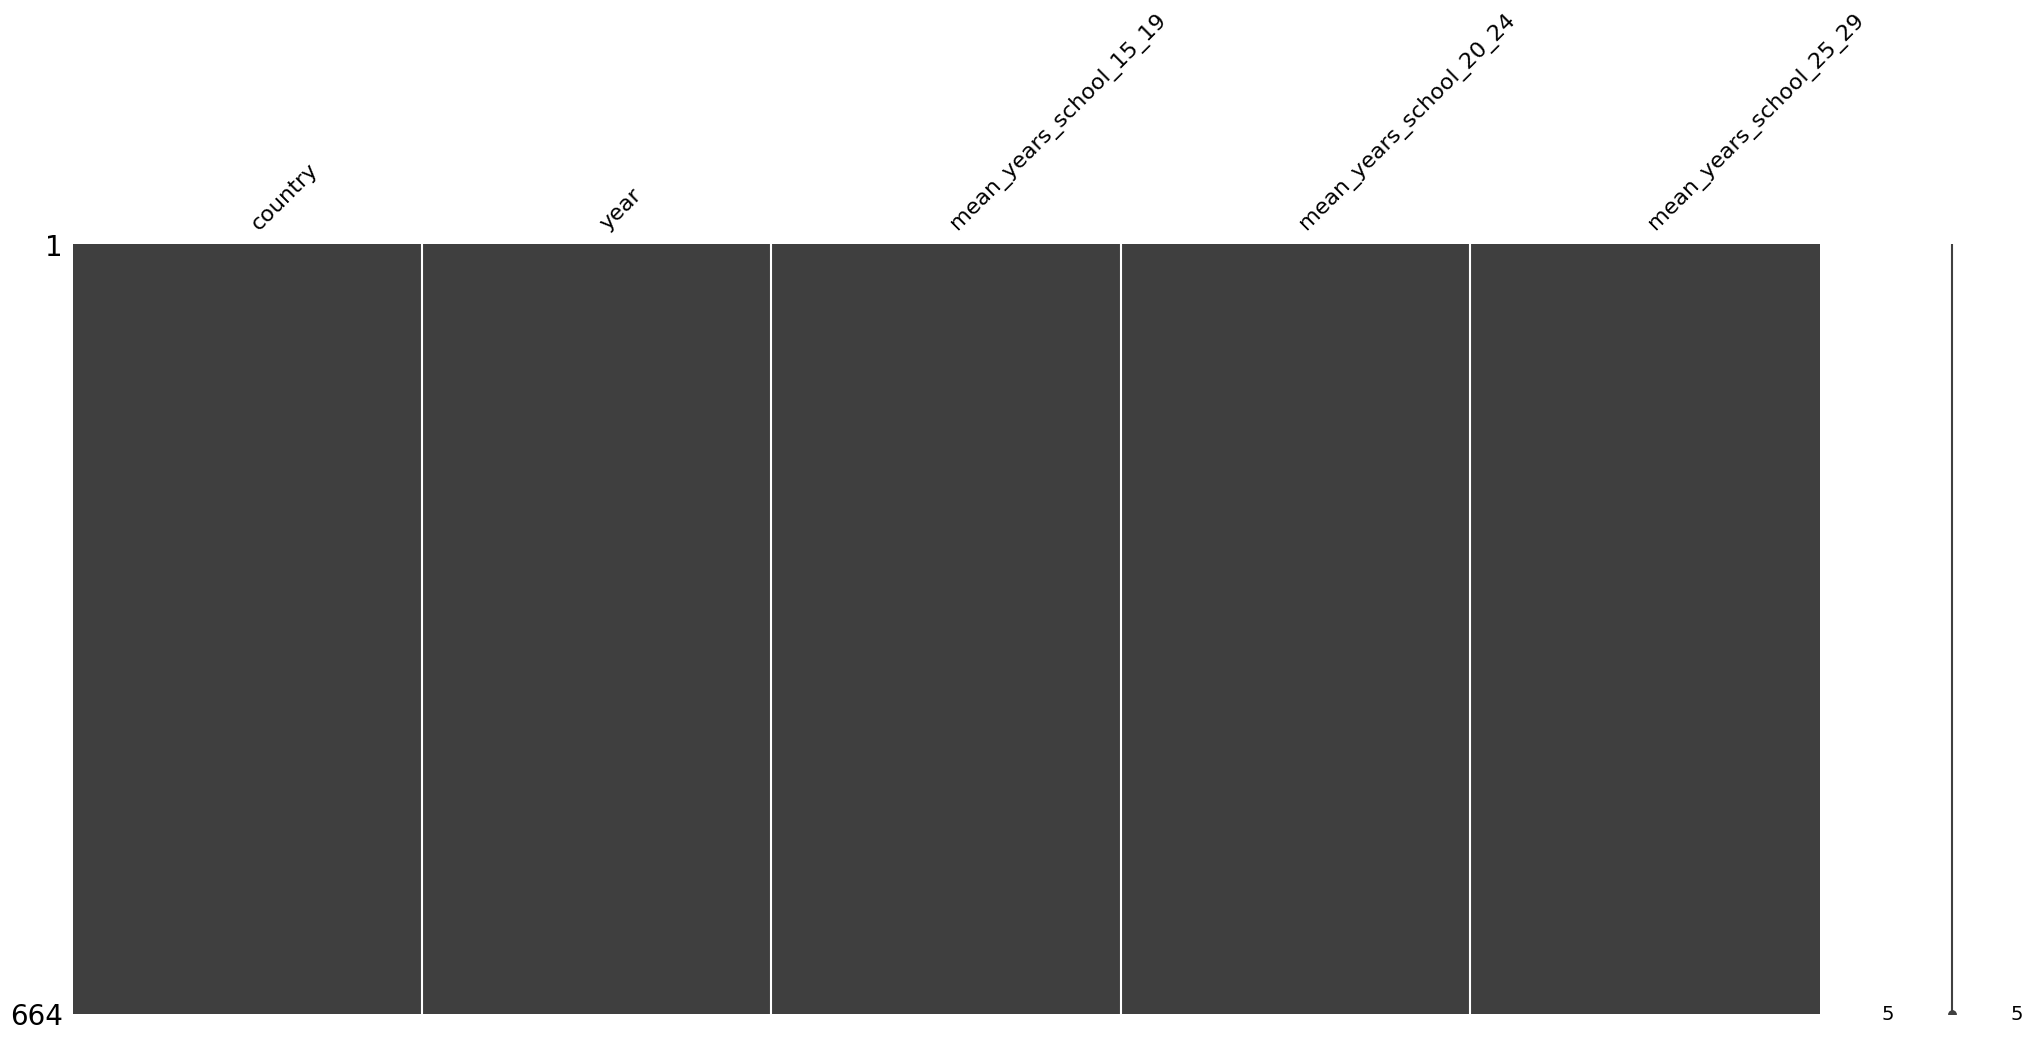

In [279]:
df_forecast.replace(0, np.nan, inplace=True)

%matplotlib inline
msno.matrix(df_forecast.sample(664))

Pour chaque colonne, un trait blanc signifie une valeur nulle.

Il n'y a donc aucune valeur nulle

### Données historiques

In [280]:
df_historic = stats

In [281]:
# Rename some columns
df_historic.rename(columns={'Indicator Name' : 'indicator', 'Country Name': 'country'}, inplace = True)

In [282]:
# Delete the last column
df_historic = df_historic.iloc[:, :-1]

In [283]:
# Drop duplicated columns (here no columns were duplicated)
print(f"Number of ligns before drop duplicates : {df_historic.shape[1]}")
df_historic.drop_duplicates(subset=["country", "indicator"], keep='first')
print(f"Number of ligns after drop duplicates : {df_historic.shape[1]}")

Number of ligns before drop duplicates : 69
Number of ligns after drop duplicates : 69


In [284]:
# Choose dimensions and years to use for the forecast
df_historic = df_historic[['country', 'indicator', "2012", "2013", "2014", "2015", "2015"]]

In [285]:
# Regroup all years columns into one
df_historic = pd.melt(df_historic, id_vars=['country', 'indicator'], var_name="year", value_name="value")
df_historic = df_historic.sort_values(by=['country', 'indicator', 'year']).reset_index(drop=True)

df_historic = df_historic[~df_historic['indicator'].str.contains("Wittgenstein Projection")]

df_historic.head()

,country,indicator,year,value
0,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2012,NaN
1,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2013,47.436790
2,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2014,50.627232
3,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2015,NaN
4,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2015,NaN


In [286]:
# Divide all values in indicator column to create new columns
df_historic = df_historic.pivot_table(index=['country', 'year'], columns='indicator', values='value', aggfunc='sum').reset_index()
# Renaming columns for clarity
df_historic.columns.name = None
df_historic.head()

,country,year,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)",...,"Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)","Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
0,Afghanistan,2012,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,...,7.2,8.000000,0.00000,0.0,0.0,0.0,0.0000,0.00000,0.00000,0.00000
1,Afghanistan,2013,47.436790,34.073261,0.56706,60.087059,0.000000,0.000000,0.00000,0.00000,...,7.5,8.400000,0.00000,0.0,0.0,0.0,0.0000,0.00000,0.00000,0.00000
2,Afghanistan,2014,50.627232,37.641541,0.59837,62.906952,0.000000,0.000000,0.00000,0.00000,...,7.7,8.600000,0.00000,0.0,0.0,0.0,0.0000,0.00000,0.00000,0.00000
3,Afghanistan,2015,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,...,15.4,17.200001,0.00000,0.0,0.0,0.0,0.0000,0.00000,0.00000,0.00000
4,Albania,2012,0.000000,0.000000,0.00000,0.000000,96.137093,95.353287,0.98445,96.85965,...,14.3,13.400000,58.87608,4302.0,2533.0,1769.0,99.2314,99.02019,0.99642,99.37598


In [287]:
# Delete all values in the country column that are not countries
non_countries = [
    'Arab World',
    'East Asia & Pacific',
    'East Asia & Pacific (excluding high income)',
    'Euro area',
    'Europe & Central Asia',
    'Europe & Central Asia (excluding high income)',
    'European Union',
    'Heavily indebted poor countries (HIPC)',
    'High income',
    'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Least developed countries: UN classification',
    'Low & middle income',
    'Low income',
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (excluding high income)',
    'Middle income',
    'North America',
    'OECD members',
    'South Asia',
    'Sub-Saharan Africa',
    'Sub-Saharan Africa (excluding high income)',
    'Upper middle income',
    'World'
 ]
df_historic =  df_historic[~df_historic["country"].isin(non_countries)]

In [288]:
# Delete countries with no data

df_historic_grouped_by_country = df_historic.groupby(['country']).sum().reset_index()
countries_with_no_data = []

# Iterate over each row in the DataFrame
for index, row in df_historic_grouped_by_country.iterrows():
    # Check if all indicator columns are 0
    if (row.drop(['country', 'year']) == 0).all():
        countries_with_no_data.append(row['country'])

df_historic =  df_historic[~df_historic["country"].isin(countries_with_no_data)]

In [289]:
# Calculate for each columns the mean of values that equal to 0.
# Sort the result in order to select columns with a rate of 50% or less
pd.set_option('display.max_rows', None)
zero_proportion = df_historic.eq(0).mean().sort_values(ascending=True)

In [290]:
historical_indicators = [
    'Internet users (per 100 people)',
    'GDP, PPP (current international $)',
    'Population, ages 4-6, total',
    'Population, ages 6-10, total',
    'Population, ages 10-16, total',
]
indicators = ['country', 'year'] + historical_indicators

In [291]:
df_historic = df_historic[indicators]

In [292]:
# Rename indicators
df_historic.rename(columns = {
    'Internet users (per 100 people)':'internet_users',
    'GDP, PPP (current international $)':'gdp_ppp',
    'Population, ages 4-6, total':'population_4_6',
    'Population, ages 6-10, total':'population_6_10',
    'Population, ages 10-16, total': 'population_10_16',
}, inplace = True)

<Axes: >

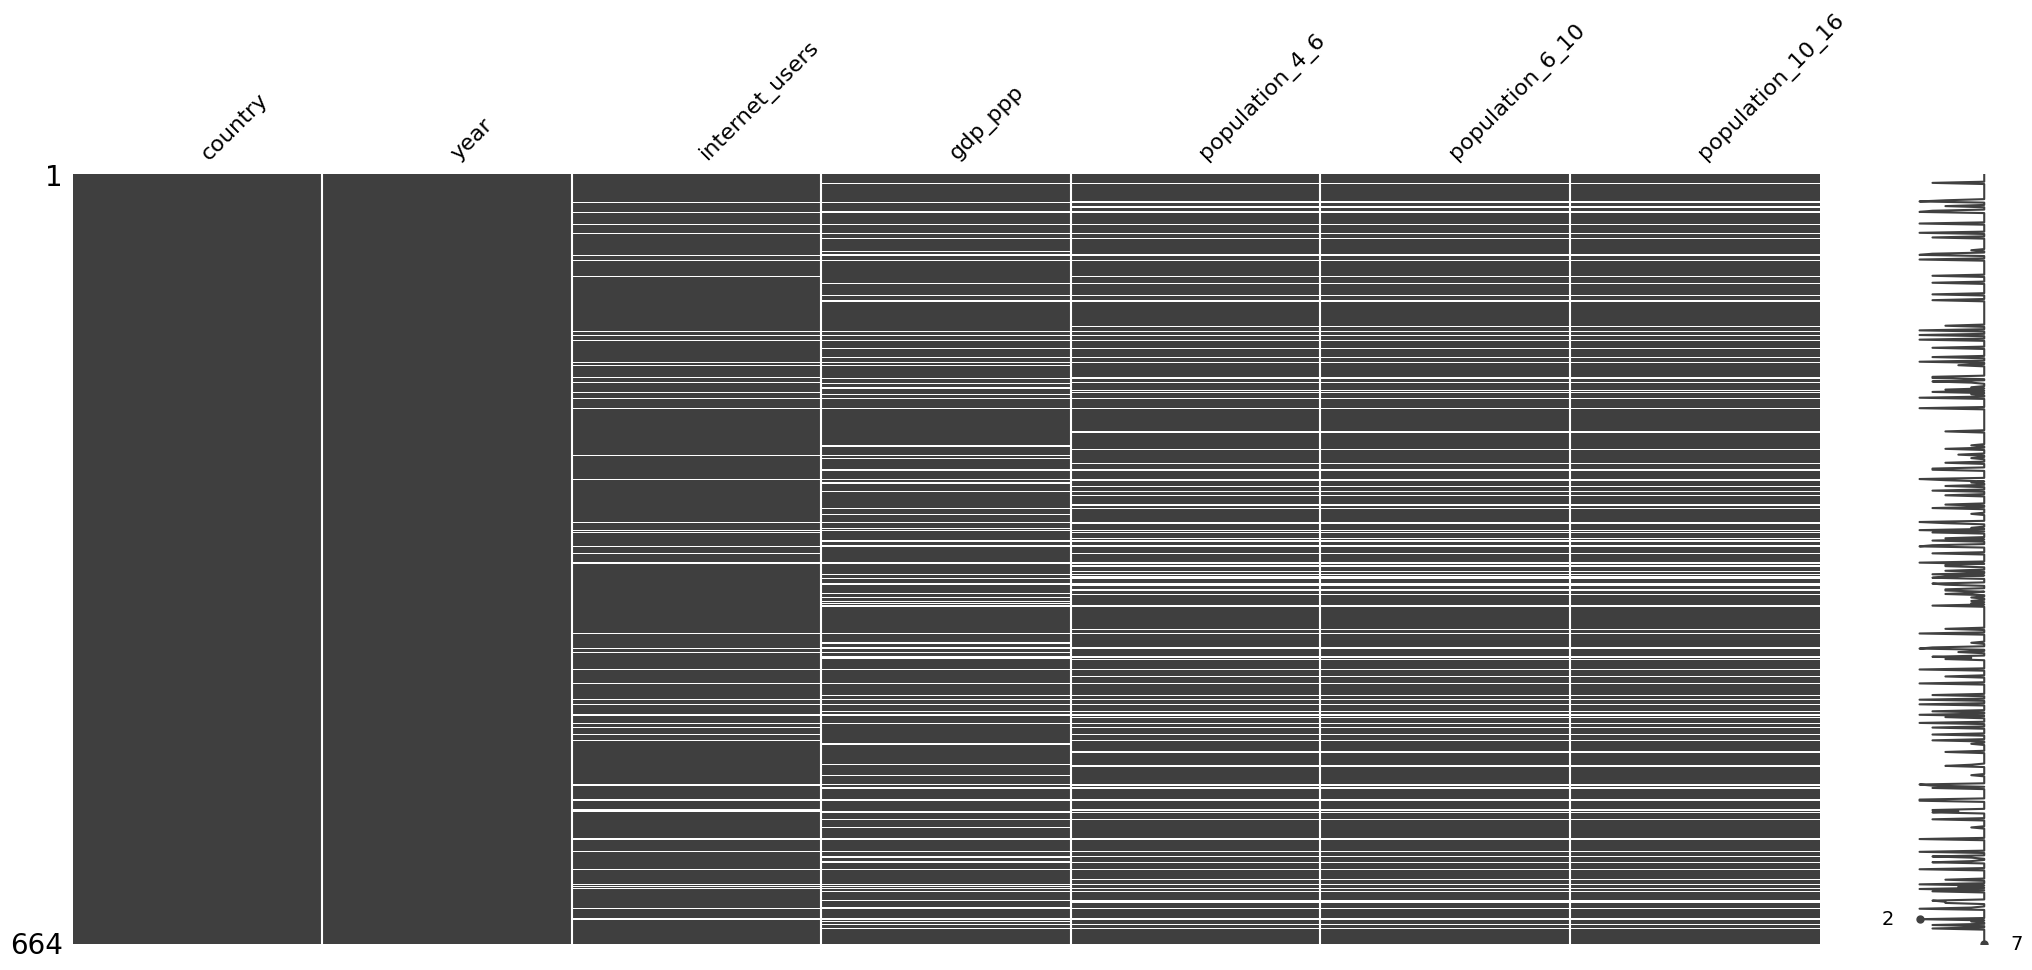

In [293]:
df_historic.replace(0, np.nan, inplace=True)

%matplotlib inline
msno.matrix(df_historic.sample(664))

In [294]:
df_historic.dtypes

country              object
year                 object
internet_users      float64
gdp_ppp             float64
population_4_6      float64
population_6_10     float64
population_10_16    float64
dtype: object

In [295]:
# df_historic['year'] = df_historic['year'].astype(int)

## Partie 3 : Analyse des jeux de données

### Données prévisionnelles

#### Analyse univariée

In [296]:
# Get the unique years from the dataframe
forecast_unique_years = df_forecast.year.unique()

In [297]:
def generate_xlabel(title: str, year: str) -> str:
    return f"{title} ({year})"

##### Nombre moyen d'années de scolarisation (personnes en 15 et 19 ans)

In [298]:
# Define the indicator to use
indicator = 'mean_years_school_15_19'

In [299]:
# Create a beautiful DataFrame from describe method

# Create a list to store individual statistics DataFrames
stats_list = []

# Loop over the unique years and compute descriptive statistics for each year
for year in forecast_unique_years:
    stats = df_forecast[df_forecast['year'] == year][indicator].describe()
    stats['year'] = year
    stats_list.append(stats)

# Concatenate all the individual DataFrames into one and invert columns and rows
summary_stats = pd.concat(stats_list, axis=1).transpose()

# Rearrange columns so that 'year' is the first column
summary_stats = summary_stats[['year'] + [col for col in summary_stats.columns if col != 'year']]

summary_stats

,year,count,mean,std,min,25%,50%,75%,max
mean_years_school_15_19,2025,166.0,8.677108,1.891853,3.1,7.6,9.2,9.8,12.6
mean_years_school_15_19,2030,166.0,8.841566,1.802764,3.6,7.9,9.3,9.9,12.8
mean_years_school_15_19,2035,166.0,8.998193,1.713776,4.0,8.2,9.35,10.0,12.9
mean_years_school_15_19,2040,166.0,9.143373,1.636715,4.4,8.5,9.45,10.1,13.0


In [300]:
# Calculate the coefficient of variation for each year
for year in forecast_unique_years: 
    tmp_df = df_forecast[df_forecast['year'] == year]
    
    standard_deviation = tmp_df[indicator].std()
    mean = tmp_df[indicator].mean()
    
    cv = round(
        standard_deviation / mean * 100,
        4
    )

    print(f"The coeficient of variation for the year {year} is : {cv}")

The coeficient of variation for the year 2025 is : 21.8028
The coeficient of variation for the year 2030 is : 20.3896
The coeficient of variation for the year 2035 is : 19.0458
The coeficient of variation for the year 2040 is : 17.9006


In [301]:
# Calculate the skewness for each years
for year in forecast_unique_years: 
    tmp_df = df_forecast[df_forecast['year'] == year]
    
    skew = round(tmp_df[indicator].skew(), 4)

    print(f"The skewness for the year {year} is : {skew}")

The skewness for the year 2025 is : -0.8638
The skewness for the year 2030 is : -0.8237
The skewness for the year 2035 is : -0.7803
The skewness for the year 2040 is : -0.7236


In [302]:
first_part_title = "Mean year of schooling, age 15-19"

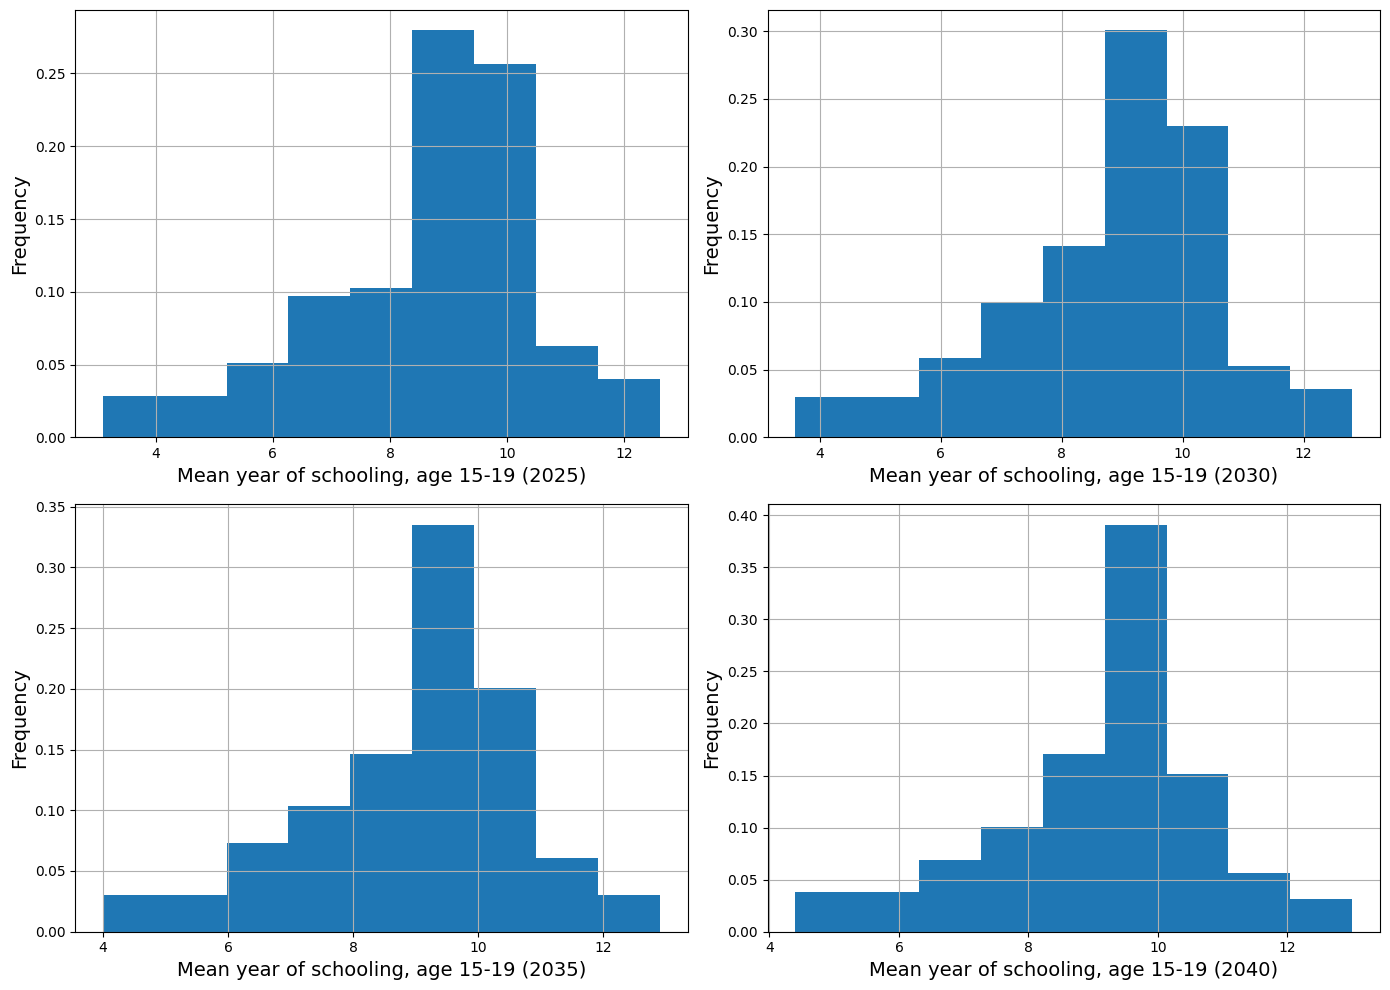

In [303]:
# Create histograms for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(forecast_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Calculate number of classes
number_of_rows =  df_forecast[df_forecast['year'] == '2025'].shape[0]
bins = int(np.ceil(1 + np.log2(number_of_rows)))

# Loop over the years and corresponding axes
for i, year in enumerate(forecast_unique_years):

    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year][indicator]
    data.hist(density=True, bins=bins, ax=ax)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

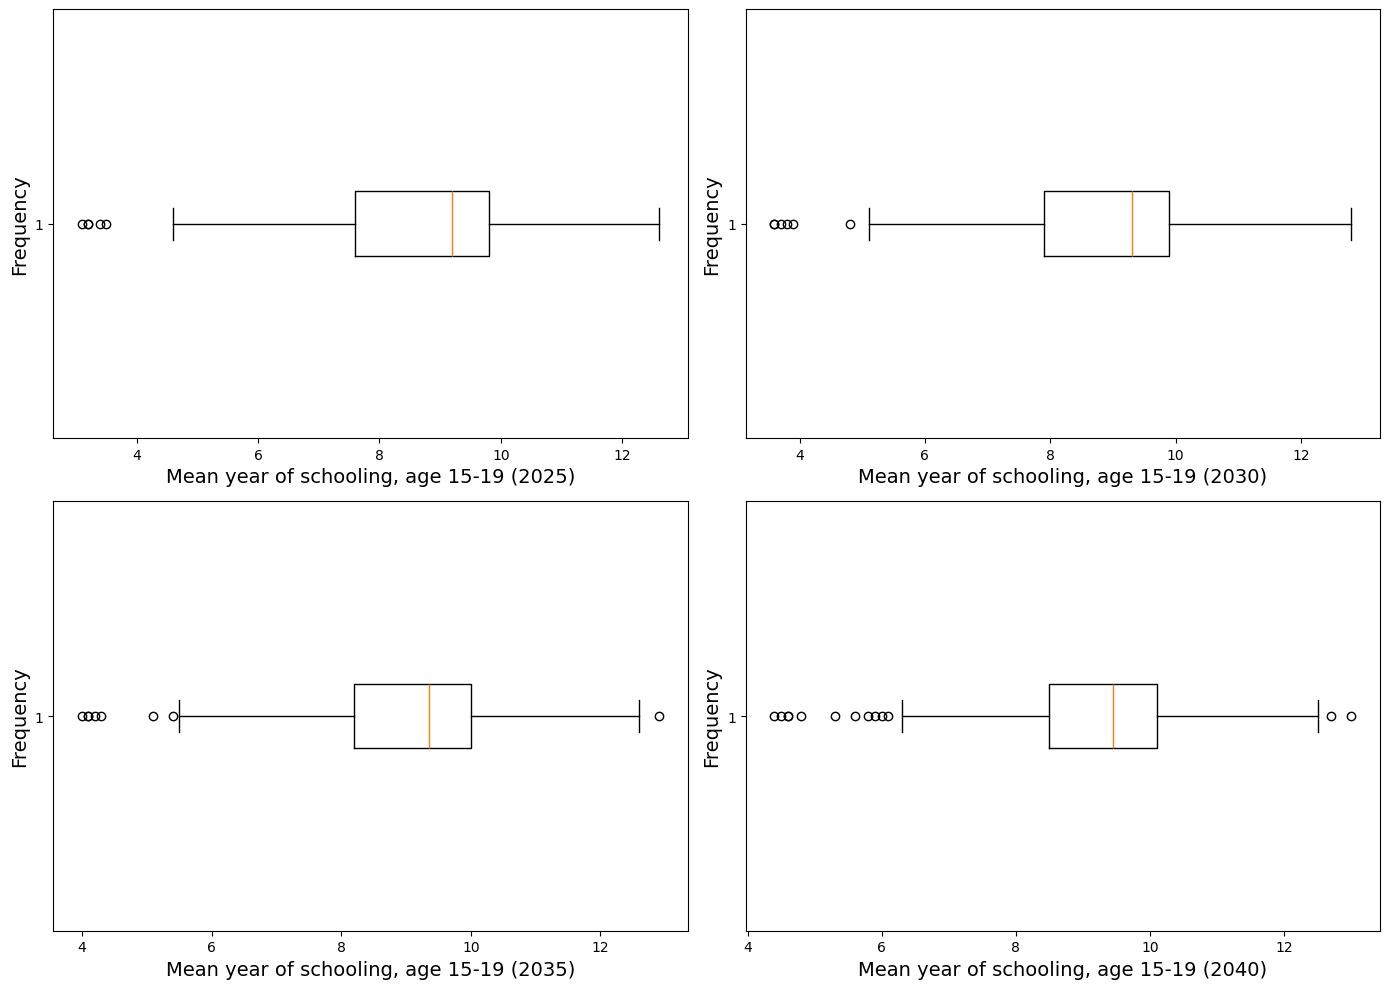

In [304]:
# Create box plot for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(forecast_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()
 
# Loop over the years and corresponding axes
for i, year in enumerate(forecast_unique_years):
    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year][indicator]
    ax.boxplot(data, vert=False)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

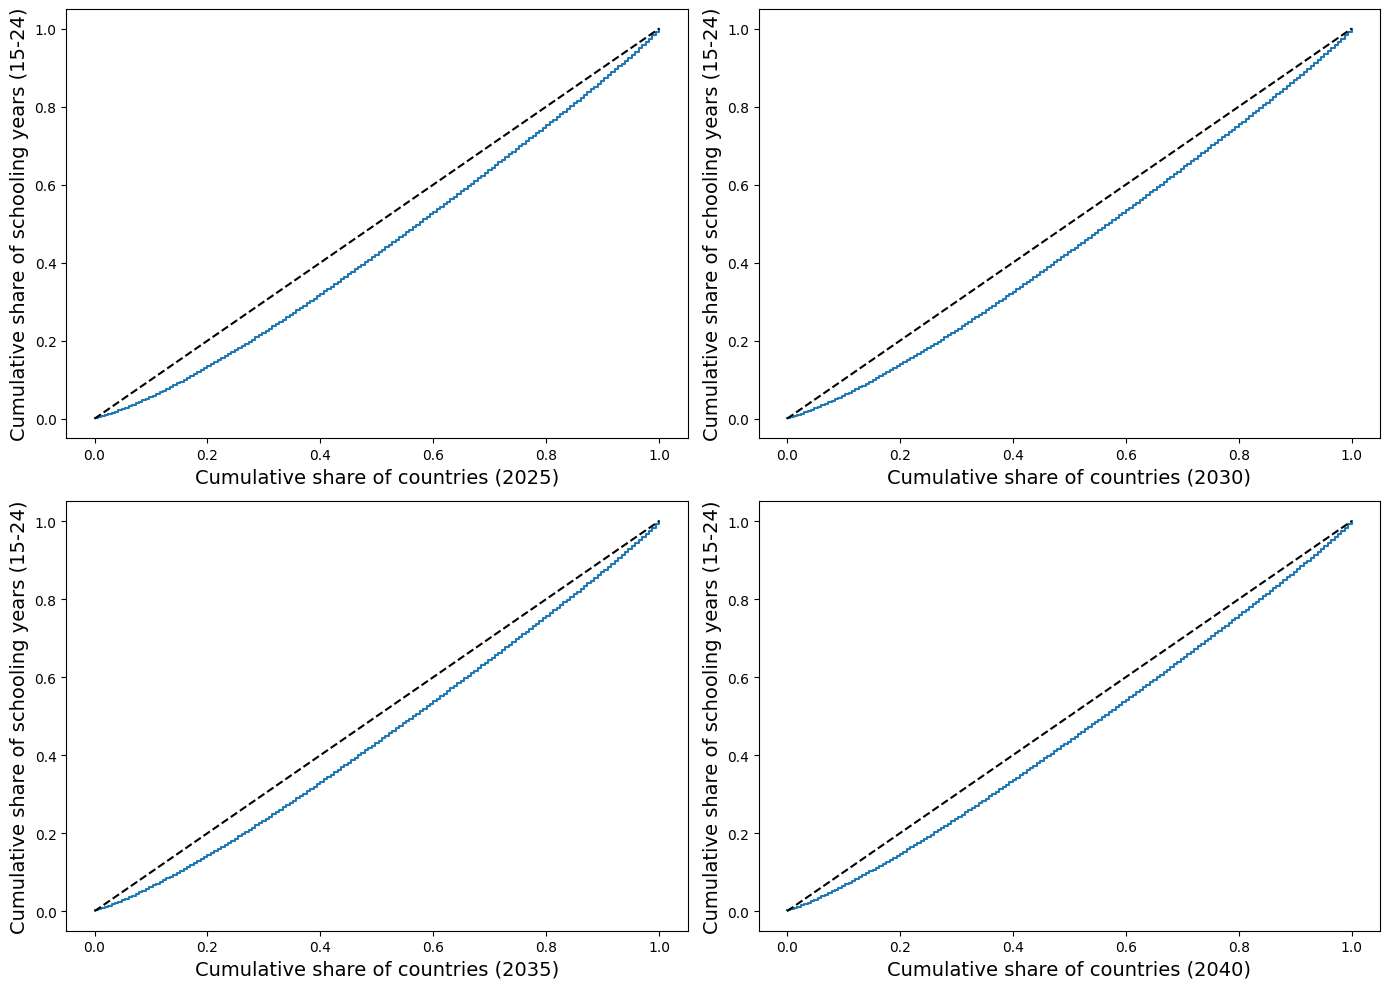

In [305]:
# Create Lorenz curve for each years

def generate_ratio_cumulative_data(data: pd.Series) -> np.ndarray:
    """
    Generate a array with a ratio cumulative data from Series
    """
    # Sort the data
    sorted_data = np.sort(data)
    n = len(sorted_data)

    # Compute the cumulative sum
    cumulative_data = np.cumsum(sorted_data)
    sum_data = np.sum(sorted_data)
    ratio_cumulative_data = cumulative_data / sum_data
    
    # Add (0,0) to the curve
    cumulative_data = np.insert(cumulative_data, 0, 0)

    return ratio_cumulative_data

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes for Lorenz curves
for i, year in enumerate(forecast_unique_years):
    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year][indicator]
    
    # Compute Lorenz curve
    lorenz_data = generate_ratio_cumulative_data(data)
    ax.plot(np.linspace(0, 1, len(lorenz_data)), lorenz_data, drawstyle='steps-post')
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')  # 45-degree line for equality
    
    ax.set_xlabel(f'Cumulative share of countries ({year})', fontsize=14)
    ax.set_ylabel('Cumulative share of schooling years (15-24)', fontsize=14)


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [306]:
# Get all countries that have a mean year of schooling greater than Q1, for each years
mean_years_school_15_19_countries = []
excluded_countries = set()

for year in forecast_unique_years:
    threshold = summary_stats[summary_stats['year'] == year]['25%'].iloc[0]
    excluded_countries.update(df_forecast[(df_forecast['year'] == year) & (df_forecast[indicator] < threshold)]['country'])

# Finding the countries which meet the criteria
mean_years_school_15_19_countries = set(df_forecast['country']) - excluded_countries

Analyse du nombre moyenne d'année des scolarisation pour les personnes ayant entre 15 et 19 ans
Plus la valeur du coefficient de variation est grande, plus la dispersion autour de la moyenne est grande.

On peut remarquer que ce coefficient diminue à mesure des années.

Cela est due au fait que la moyenne grandie est que l'écart type diminue.

Donc il y a plus d'individus dans la moyenne et ils sont moins dispersés.

Avec le coefficient de variation, nous pouvons voir que notre distribution est étalé sur la gauche. Et il elle se recentre au fil des années.

La courbe de Lorenz, qui sert à montrer l'égalité entre les individus (ici les pays), nous montre que les inégalités diminuent car l'aire entre la courbe et la droite diminue.

---

##### Nombre moyen d'années de scolarisation (personnes en 20 et 24 ans)

In [307]:
# Define the indicator to use
indicator = 'mean_years_school_20_24'

In [308]:
# Create a beautiful DataFrame from describe method

# Create a list to store individual statistics DataFrames
stats_list = []

# Loop over the unique years and compute descriptive statistics for each year
for year in forecast_unique_years:
    stats = df_forecast[df_forecast['year'] == year][indicator].describe()
    stats['year'] = year
    stats_list.append(stats)

# Concatenate all the individual DataFrames into one and invert columns and rows
summary_stats = pd.concat(stats_list, axis=1).transpose()

# Rearrange columns so that 'year' is the first column
summary_stats = summary_stats[['year'] + [col for col in summary_stats.columns if col != 'year']]

summary_stats

,year,count,mean,std,min,25%,50%,75%,max
mean_years_school_20_24,2025,166.0,10.371084,2.510899,3.1,8.8,11.0,12.2,15.0
mean_years_school_20_24,2030,166.0,10.610241,2.394125,3.5,9.2,11.1,12.4,15.1
mean_years_school_20_24,2035,166.0,10.839157,2.272598,4.0,9.625,11.3,12.5,15.1
mean_years_school_20_24,2040,166.0,11.046988,2.163238,4.5,9.925,11.5,12.675,15.3


In [309]:
# Calculate the coefficient of variation for each year
for year in forecast_unique_years: 
    tmp_df = df_forecast[df_forecast['year'] == year]
    
    standard_deviation = tmp_df[indicator].std()
    mean = tmp_df[indicator].mean()
    
    cv = round(
        standard_deviation / mean * 100,
        4
    )

    print(f"The coeficient of variation for the year {year} is : {cv}")

The coeficient of variation for the year 2025 is : 24.2106
The coeficient of variation for the year 2030 is : 22.5643
The coeficient of variation for the year 2035 is : 20.9666
The coeficient of variation for the year 2040 is : 19.5821


In [310]:
# Calculate the skewness for each years
for year in forecast_unique_years: 
    tmp_df = df_forecast[df_forecast['year'] == year]
    
    skew = round(tmp_df[indicator].skew(), 4)

    print(f"The skewness for the year {year} is : {skew}")

The skewness for the year 2025 is : -0.8357
The skewness for the year 2030 is : -0.847
The skewness for the year 2035 is : -0.8508
The skewness for the year 2040 is : -0.8316


In [311]:
first_part_title = "Mean year of schooling, age 20-24"

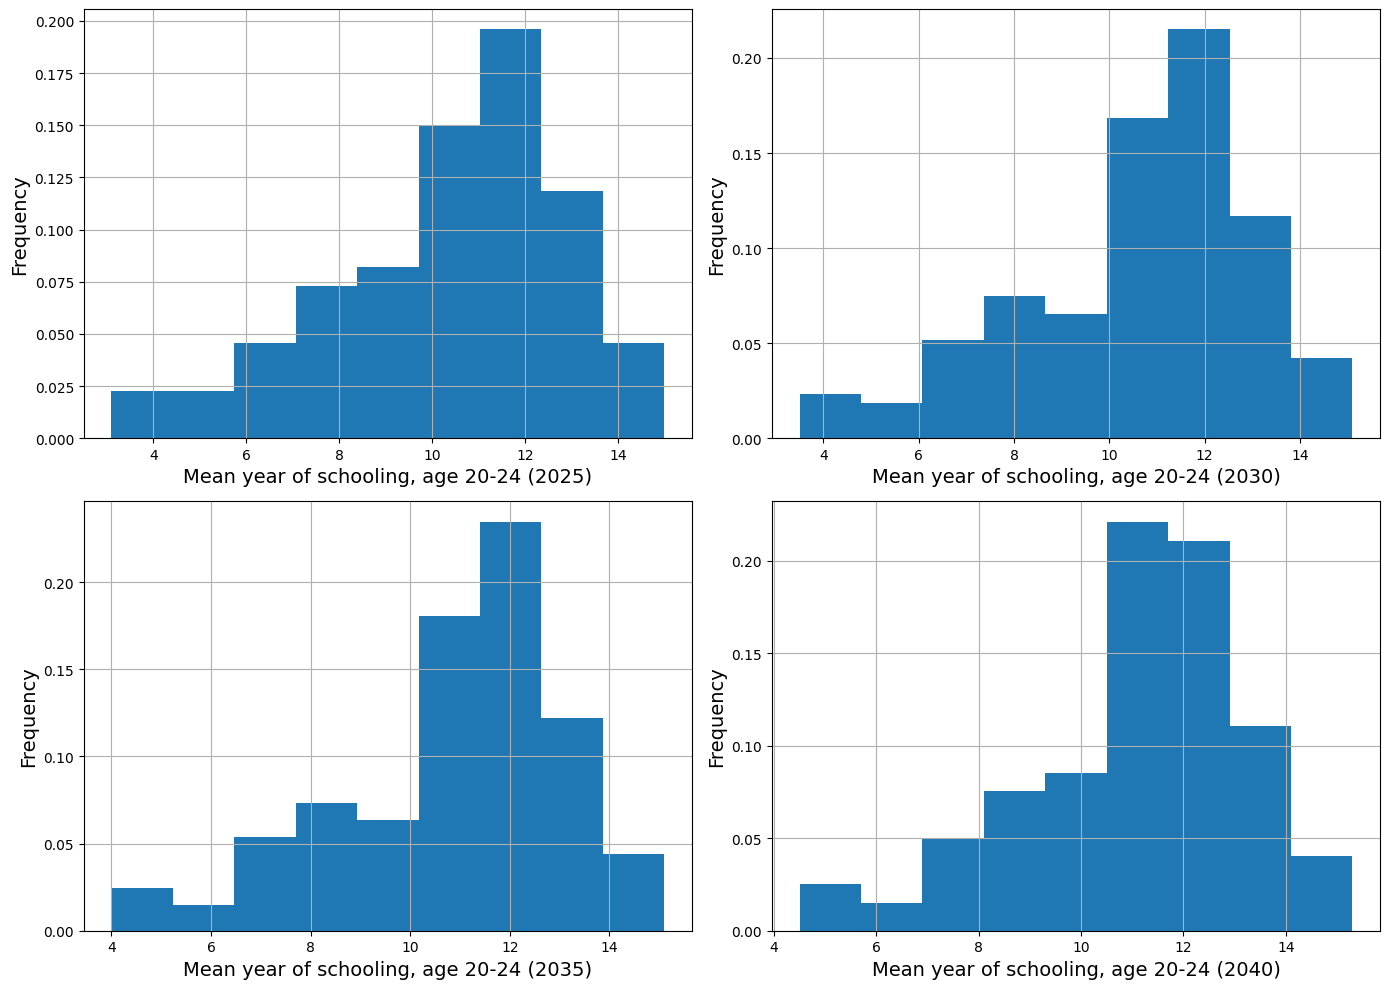

In [312]:
# Create histograms for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(forecast_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Calculate number of classes
number_of_rows =  df_forecast[df_forecast['year'] == '2025'].shape[0]
bins = int(np.ceil(1 + np.log2(number_of_rows)))

# Loop over the years and corresponding axes
for i, year in enumerate(forecast_unique_years):

    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year][indicator]
    data.hist(density=True, bins=bins, ax=ax)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

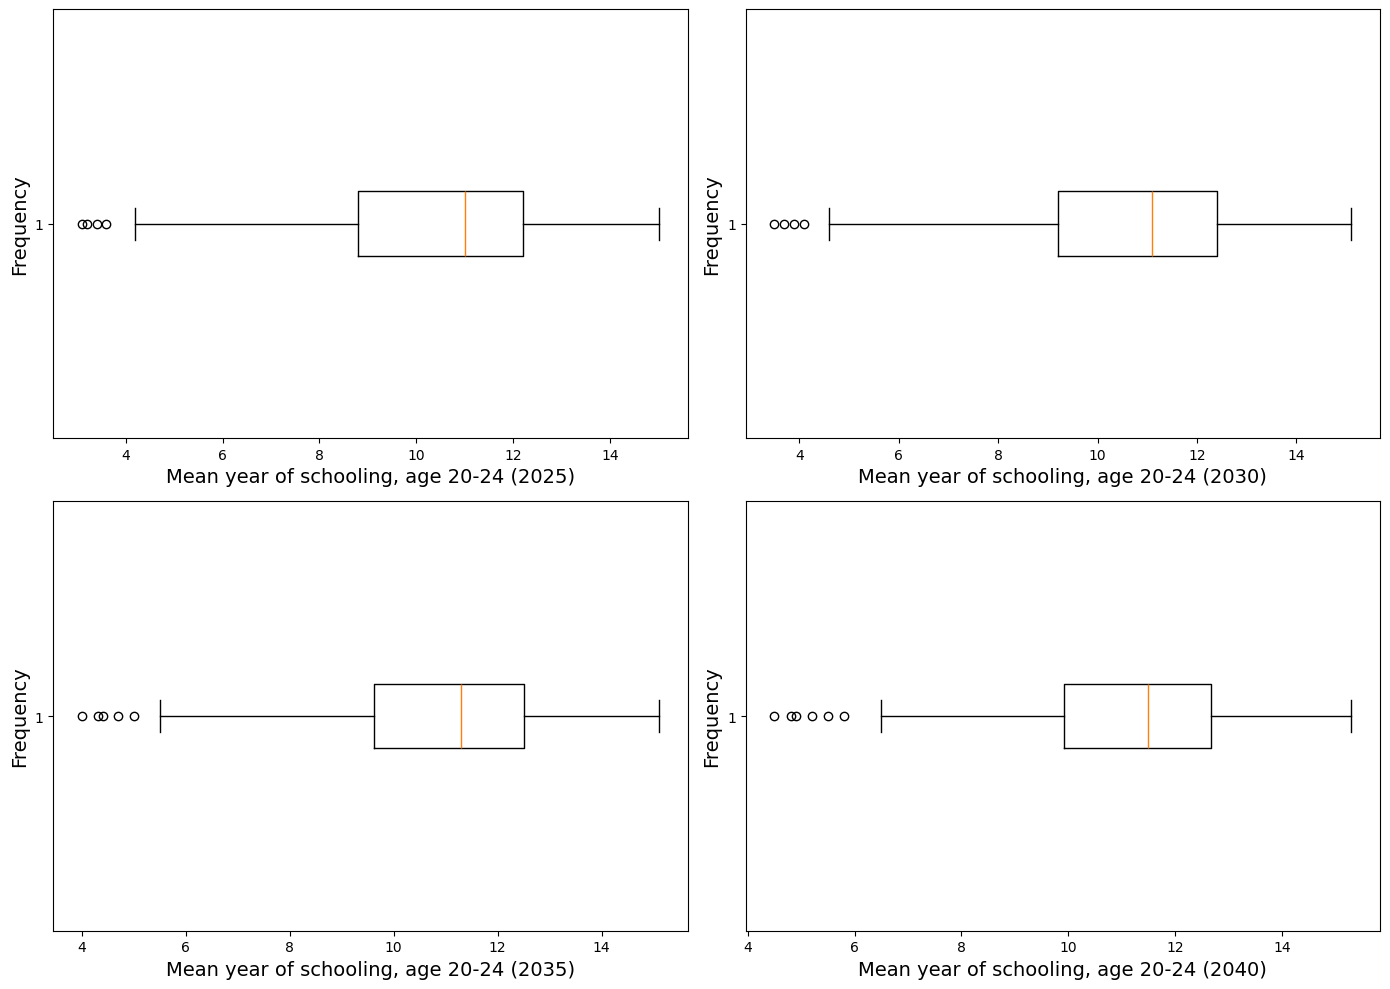

In [313]:
# Create box plot for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(forecast_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()
 
# Loop over the years and corresponding axes
for i, year in enumerate(forecast_unique_years):
    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year][indicator]
    ax.boxplot(data, vert=False)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

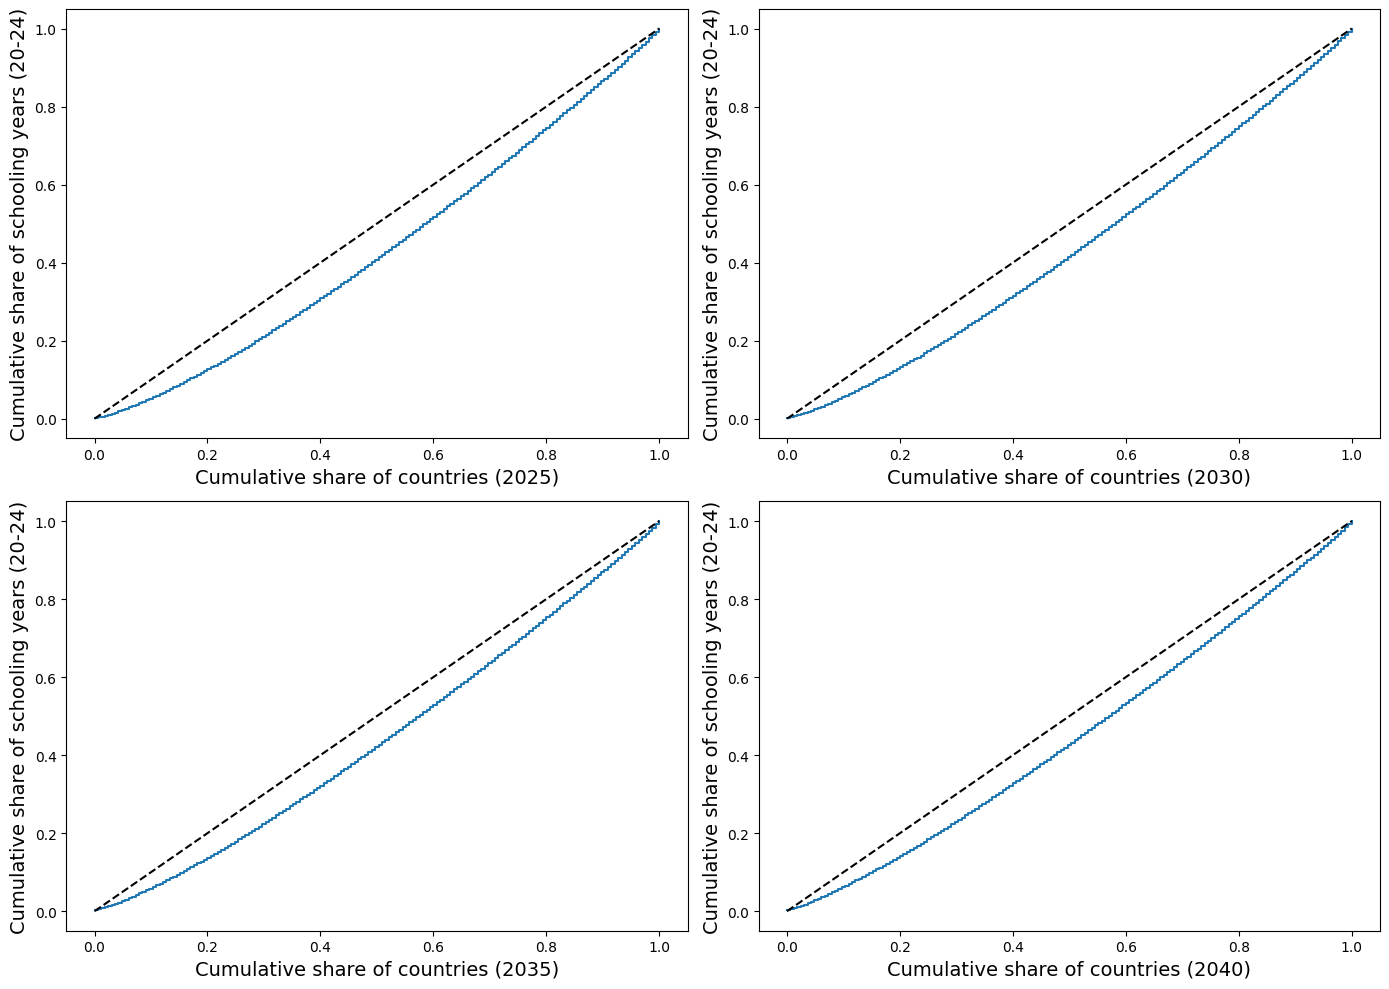

In [314]:
# Create Lorenz curve for each years

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes for Lorenz curves
for i, year in enumerate(forecast_unique_years):
    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year][indicator]
    
    # Compute Lorenz curve
    lorenz_data = generate_ratio_cumulative_data(data)
    ax.plot(np.linspace(0, 1, len(lorenz_data)), lorenz_data, drawstyle='steps-post')
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')  # 45-degree line for equality
    
    ax.set_xlabel(f'Cumulative share of countries ({year})', fontsize=14)
    ax.set_ylabel('Cumulative share of schooling years (20-24)', fontsize=14)


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [315]:
# Get all countries that have a mean year of schooling greater than Q1,  for each years
mean_years_school_20_24_countries = []
excluded_countries = set()

for year in forecast_unique_years:
    threshold = summary_stats[summary_stats['year'] == year]['25%'].iloc[0]
    excluded_countries.update(df_forecast[(df_forecast['year'] == year) & (df_forecast[indicator] < threshold)]['country'])

# Finding the countries which meet the criteria
mean_years_school_20_24_countries = set(df_forecast['country']) - excluded_countries

Analyse du nombre moyenne d'année des scolarisation pour les personnes ayant entre 20 et 24 ans
Plus la valeur du coefficient de variation est grande, plus la dispersion autour de la moyenne est grande.

On peut remarquer que ce coefficient diminue à mesure des années.

Cela est due au fait que la moyenne grandie est que l'écart type diminue.

Donc il y a plus d'individus dans la moyenne et ils sont moins dispersés.

Avec le coefficient de variation, nous pouvons voir que notre distribution est étalé sur la gauche. Et il elle se recentre au fil des années.

La courbe de Lorenz, qui sert à montrer l'égalité entre les individus (ici les pays), nous montre que les inégalités diminuent car l'aire entre la courbe et la droite diminue.

---

##### Nombre moyen d'années de scolarisation (personnes en 25 et 29 ans)

In [316]:
# Define the indicator to use
indicator = 'mean_years_school_25_29'

In [317]:
# Create a beautiful DataFrame from describe method

# Create a list to store individual statistics DataFrames
stats_list = []

# Loop over the unique years and compute descriptive statistics for each year
for year in forecast_unique_years:
    stats = df_forecast[df_forecast['year'] == year][indicator].describe()
    stats['year'] = year
    stats_list.append(stats)

# Concatenate all the individual DataFrames into one and invert columns and rows
summary_stats = pd.concat(stats_list, axis=1).transpose()

# Rearrange columns so that 'year' is the first column
summary_stats = summary_stats[['year'] + [col for col in summary_stats.columns if col != 'year']]

summary_stats

,year,count,mean,std,min,25%,50%,75%,max
mean_years_school_25_29,2025,166.0,10.713253,2.808872,2.8,8.925,11.2,12.8,15.8
mean_years_school_25_29,2030,166.0,10.998795,2.697541,3.2,9.3,11.4,13.0,15.9
mean_years_school_25_29,2035,166.0,11.272892,2.581458,3.7,9.625,11.6,13.175,16.0
mean_years_school_25_29,2040,166.0,11.529518,2.46383,4.2,10.025,11.95,13.35,16.1


In [318]:
# Calculate the coefficient of variation for each year
for year in forecast_unique_years: 
    tmp_df = df_forecast[df_forecast['year'] == year]
    
    standard_deviation = tmp_df[indicator].std()
    mean = tmp_df[indicator].mean()
    
    cv = round(
        standard_deviation / mean * 100,
        4
    )

    print(f"The coeficient of variation for the year {year} is : {cv}")

The coeficient of variation for the year 2025 is : 26.2187
The coeficient of variation for the year 2030 is : 24.5258
The coeficient of variation for the year 2035 is : 22.8997
The coeficient of variation for the year 2040 is : 21.3698


In [319]:
# Calculate the skewness for each years
for year in forecast_unique_years: 
    tmp_df = df_forecast[df_forecast['year'] == year]
    
    skew = round(tmp_df[indicator].skew(), 4)

    print(f"The skewness for the year {year} is : {skew}")

The skewness for the year 2025 is : -0.7262
The skewness for the year 2030 is : -0.7417
The skewness for the year 2035 is : -0.7452
The skewness for the year 2040 is : -0.7387


In [320]:
first_part_title = "Mean year of schooling, age 25-29"

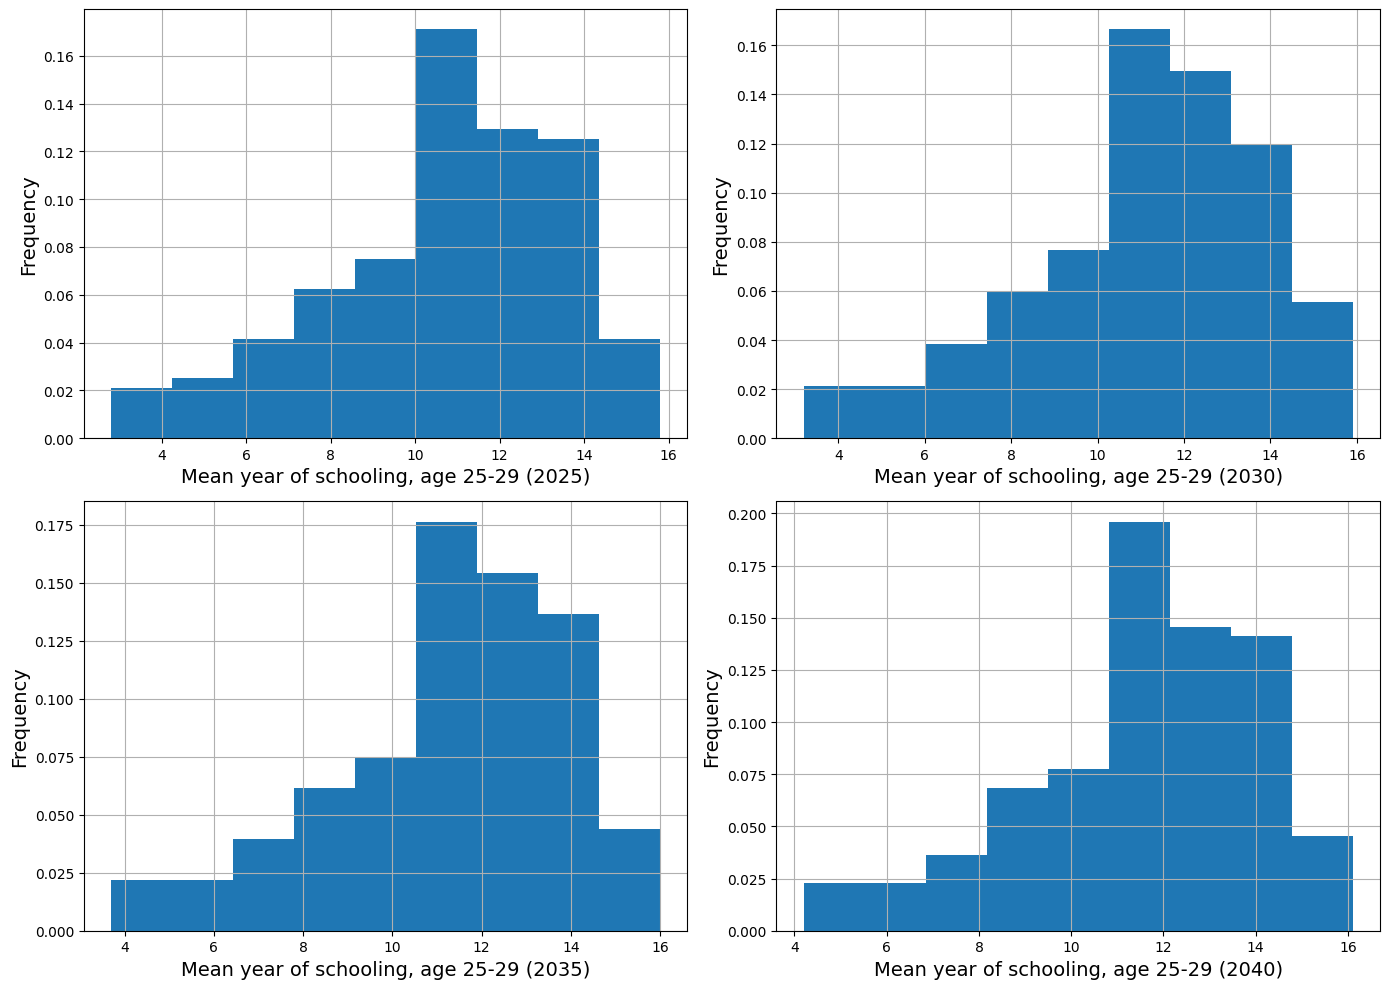

In [321]:
# Create histograms for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(forecast_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Calculate number of classes
number_of_rows =  df_forecast[df_forecast['year'] == '2025'].shape[0]
bins = int(np.ceil(1 + np.log2(number_of_rows)))

# Loop over the years and corresponding axes
for i, year in enumerate(forecast_unique_years):

    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year][indicator]
    data.hist(density=True, bins=bins, ax=ax)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

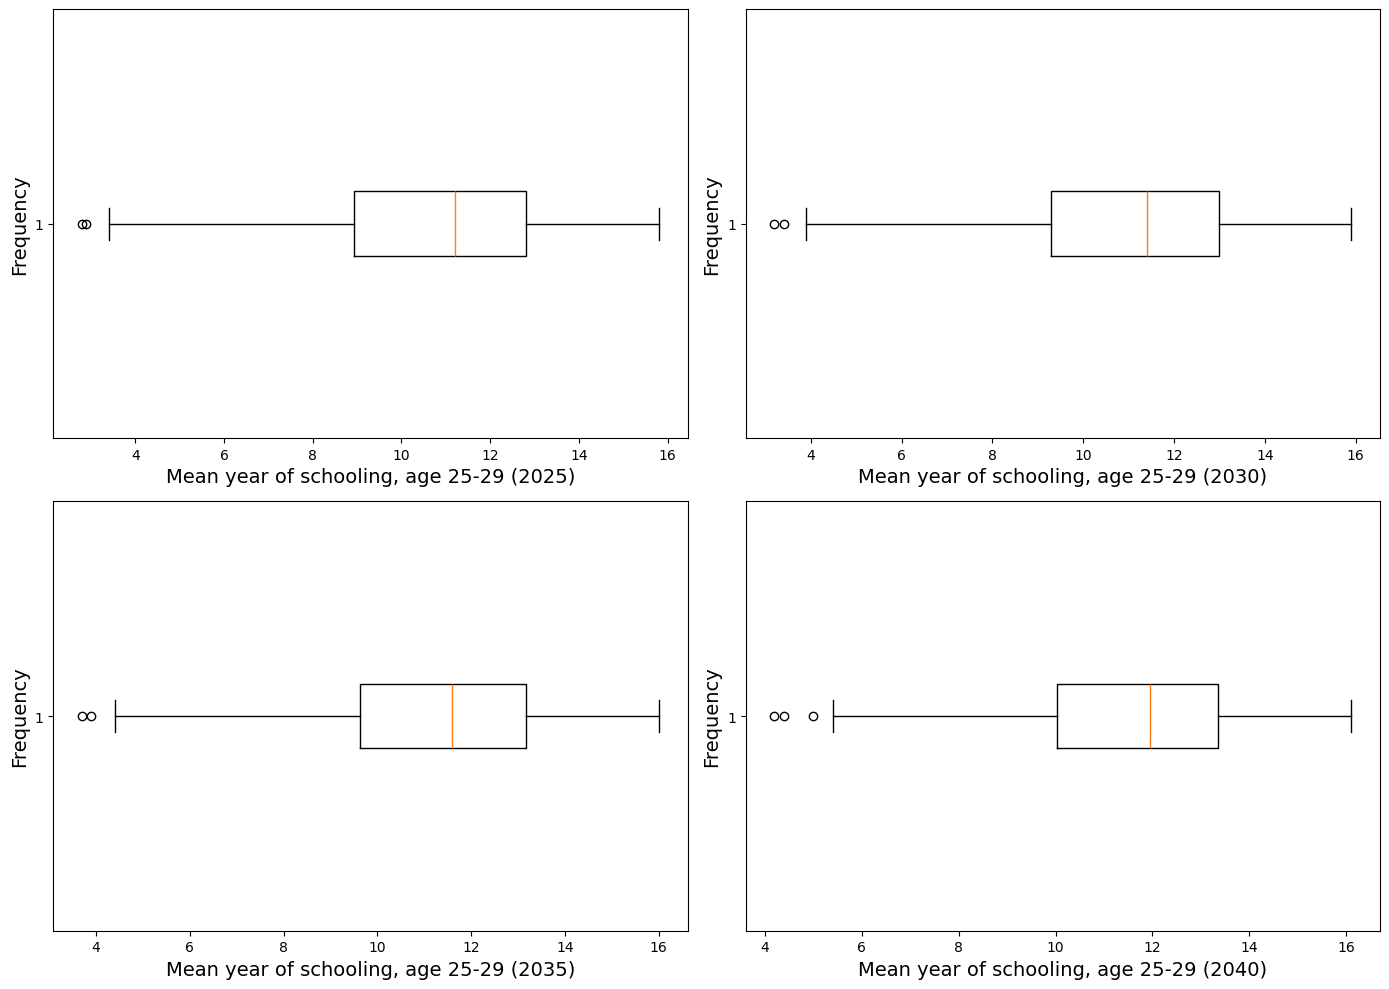

In [322]:
# Create box plot for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(forecast_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()
 
# Loop over the years and corresponding axes
for i, year in enumerate(forecast_unique_years):
    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year][indicator]
    ax.boxplot(data, vert=False)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

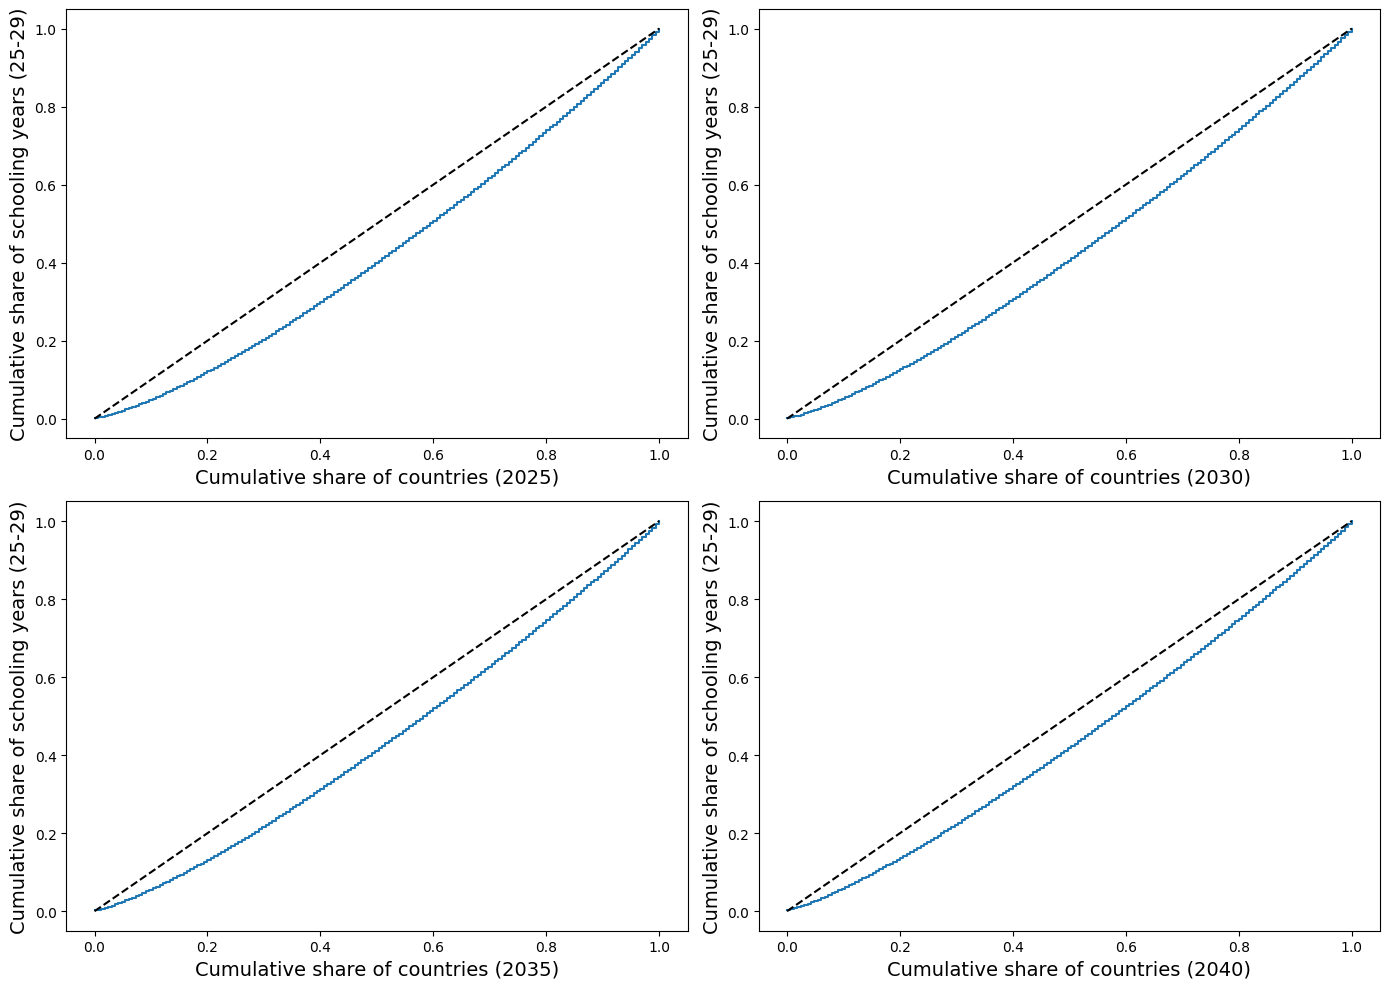

In [323]:
# Create Lorenz curve for each years

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes for Lorenz curves
for i, year in enumerate(forecast_unique_years):
    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year][indicator]
    
    # Compute Lorenz curve
    lorenz_data = generate_ratio_cumulative_data(data)
    ax.plot(np.linspace(0, 1, len(lorenz_data)), lorenz_data, drawstyle='steps-post')
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')  # 45-degree line for equality
    
    ax.set_xlabel(f'Cumulative share of countries ({year})', fontsize=14)
    ax.set_ylabel('Cumulative share of schooling years (25-29)', fontsize=14)


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [324]:
# Get all countries that have a mean year of schooling greater than Q1,  for each years
mean_years_school_25_29_countries = []
excluded_countries = set()

for year in forecast_unique_years:
    threshold = summary_stats[summary_stats['year'] == year]['25%'].iloc[0]
    excluded_countries.update(df_forecast[(df_forecast['year'] == year) & (df_forecast[indicator] < threshold)]['country'])

# Finding the countries which meet the criteria
mean_years_school_25_29_countries = set(df_forecast['country']) - excluded_countries

Analyse du nombre moyenne d'année des scolarisation pour les personnes ayant entre 25 et 29 ans
Plus la valeur du coefficient de variation est grande, plus la dispersion autour de la moyenne est grande.

On peut remarquer que ce coefficient diminue à mesure des années.

Cela est due au fait que la moyenne grandie est que l'écart type diminue.

Donc il y a plus d'individus dans la moyenne et ils sont moins dispersés.

Avec le coefficient de variation, nous pouvons voir que notre distribution est étalé sur la gauche. Et il elle se recentre au fil des années.

La courbe de Lorenz, qui sert à montrer l'égalité entre les individus (ici les pays), nous montre que les inégalités diminuent car l'aire entre la courbe et la droite diminue.

---

#### Analyse bivariée

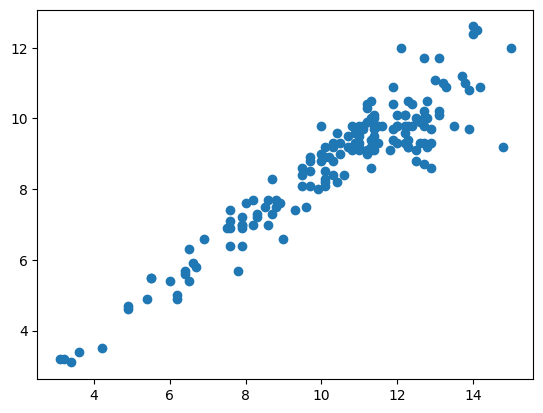

In [325]:
plt.scatter(df_forecast[df_forecast['year'] == '2025']['mean_years_school_20_24'], df_forecast[df_forecast['year'] == '2025']['mean_years_school_15_19'])
plt.show()

In [326]:
cols = [c for c in df_forecast[df_forecast['year']=='2025'].columns if c != "country" and c != "year"]
matrix = df_forecast[df_forecast['year']=='2025'][cols].corr()

<Axes: >

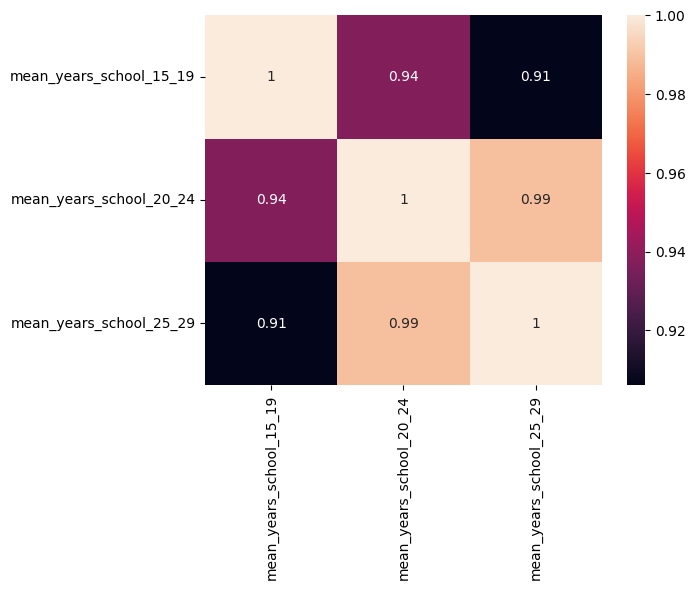

In [327]:
import seaborn as sns
sns.heatmap(matrix, annot=True)

### Données historiques

#### Analyse univariée

In [328]:
# Get the unique years from the dataframe
historic_unique_years = df_historic.year.unique()

##### Nombre de personnes ayant accès à Internet (pour 100 personnes)

In [329]:
# Define the indicator to use
indicator = 'population_4_6'

In [330]:
# Delete countries with Nan values
def drop_countries_with_no_data(df: pd.DataFrame, indicator: str) -> pd.DataFrame:
    """
    Delete countries whiches have no data at least for one year, for a specific column
    """
    df_no_data = df[df[indicator].isna()]
    countries_with_no_data = df_no_data.country.unique().tolist()

    df = df[~df["country"].isin(countries_with_no_data)]

    return df

df_historic = drop_countries_with_no_data(df_historic, indicator)

In [331]:
# Create a beautiful DataFrame from describe method

# Create a list to store individual statistics DataFrames
stats_list = []

# Loop over the unique years and compute descriptive statistics for each year
for year in historic_unique_years:
    stats = df_historic[df_historic['year'] == year][indicator].describe()
    stats['year'] = year
    stats_list.append(stats)

# Concatenate all the individual DataFrames into one and invert columns and rows
summary_stats = pd.concat(stats_list, axis=1).transpose()

# Rearrange columns so that 'year' is the first column
summary_stats = summary_stats[['year'] + [col for col in summary_stats.columns if col != 'year']]

summary_stats

,year,count,mean,std,min,25%,50%,75%,max
population_4_6,2012,181.0,2077832.298343,6984094.055399,4252.0,130634.0,441210.0,1685402.0,75068187.0
population_4_6,2013,181.0,2092472.994475,7011477.371179,4193.0,133098.0,442470.0,1690740.0,75051089.0
population_4_6,2014,181.0,2106300.994475,7039976.243084,4120.0,133915.0,446063.0,1707294.0,74995471.0
population_4_6,2015,181.0,4236472.895028,14124999.29014,8062.0,270584.0,903524.0,3438486.0,149785814.0


In [332]:
# Calculate the coefficient of variation for each year
for year in historic_unique_years: 
    tmp_df = df_historic[df_historic['year'] == year]
    
    standard_deviation = tmp_df[indicator].std()
    mean = tmp_df[indicator].mean()
    
    cv = round(
        standard_deviation / mean * 100,
        4
    )

    print(f"The coeficient of variation for the year {year} is : {cv}")

The coeficient of variation for the year 2012 is : 336.124
The coeficient of variation for the year 2013 is : 335.0809
The coeficient of variation for the year 2014 is : 334.2341
The coeficient of variation for the year 2015 is : 333.4141


In [333]:
# Calculate the skewness for each years
for year in historic_unique_years: 
    tmp_df = df_historic[df_historic['year'] == year]
    
    skew = round(tmp_df[indicator].skew(), 4)

    print(f"The skewness for the year {year} is : {skew}")

The skewness for the year 2012 is : 8.291
The skewness for the year 2013 is : 8.2552
The skewness for the year 2014 is : 8.2176
The skewness for the year 2015 is : 8.1818


In [334]:
first_part_title = "People which have access to Internet, per 100"

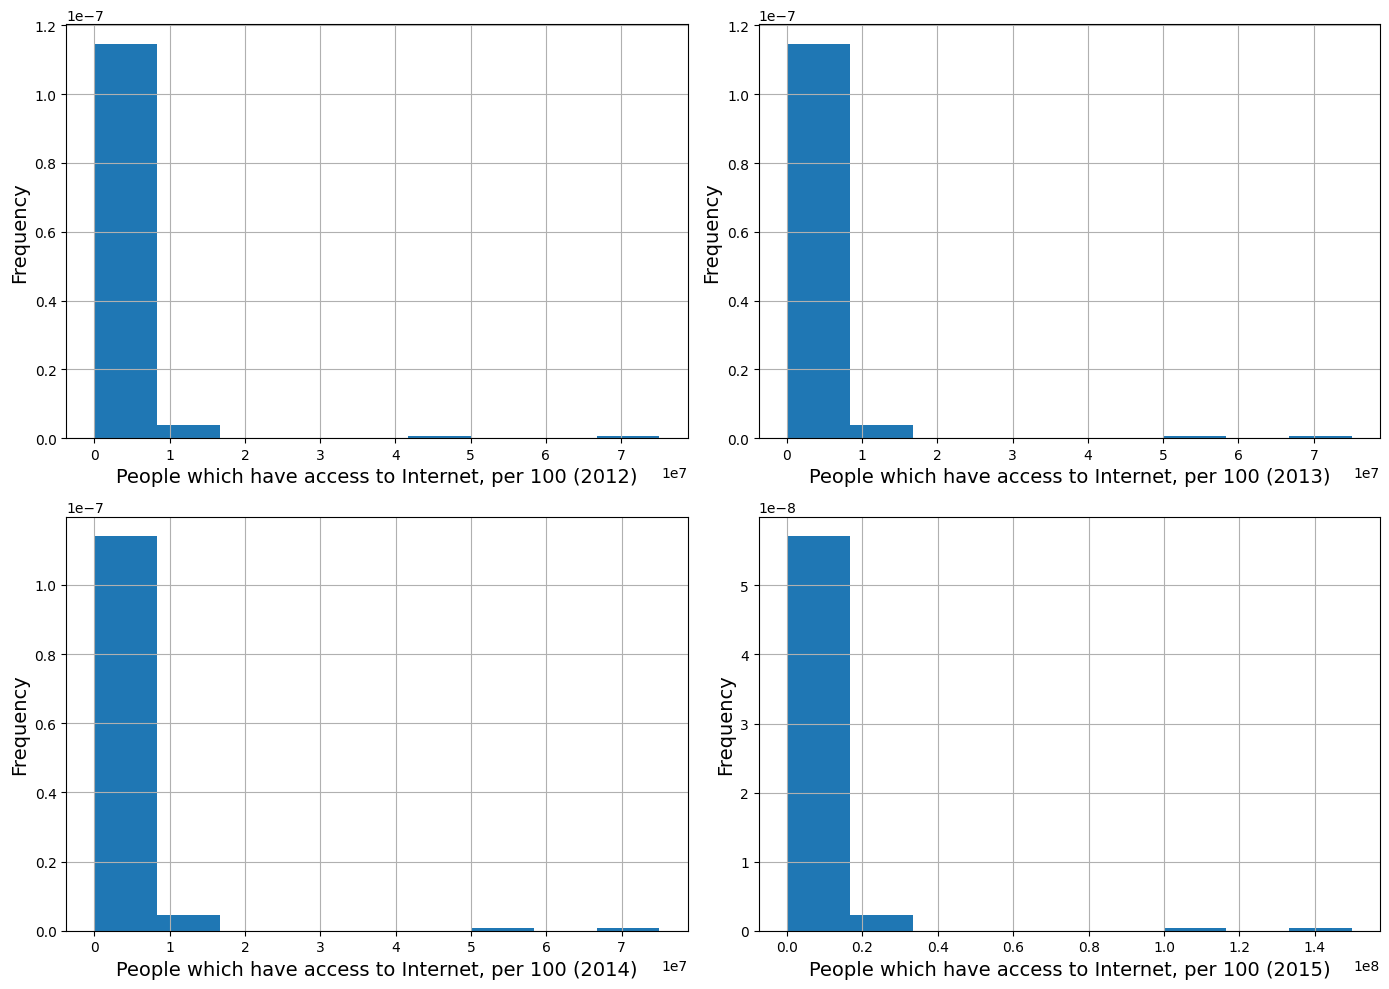

In [335]:
# Create histograms for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(historic_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Calculate number of classes
number_of_rows =  df_historic[df_historic['year'] == '2013'].shape[0]
bins = int(np.ceil(1 + np.log2(number_of_rows)))

# Loop over the years and corresponding axes
for i, year in enumerate(historic_unique_years):

    ax = axes[i]
    data = df_historic[df_historic['year'] == year][indicator]
    data.hist(density=True, bins=bins, ax=ax)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

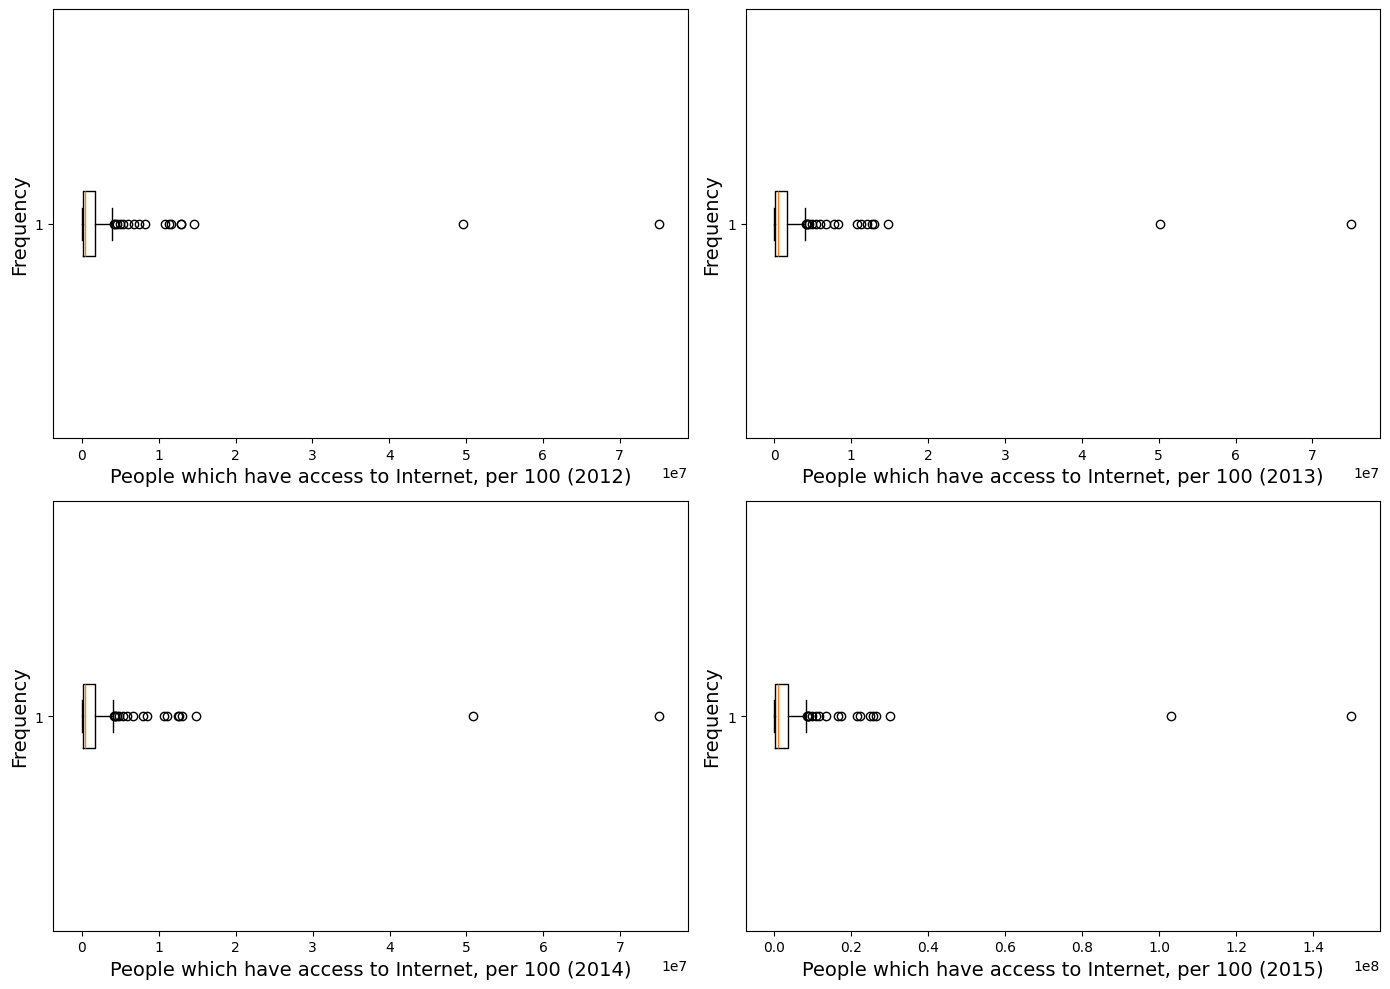

In [336]:
# Create box plot for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(historic_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes
for i, year in enumerate(historic_unique_years):
    ax = axes[i]
    data = df_historic[df_historic['year'] == year][indicator]
    ax.boxplot(data, vert=False)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

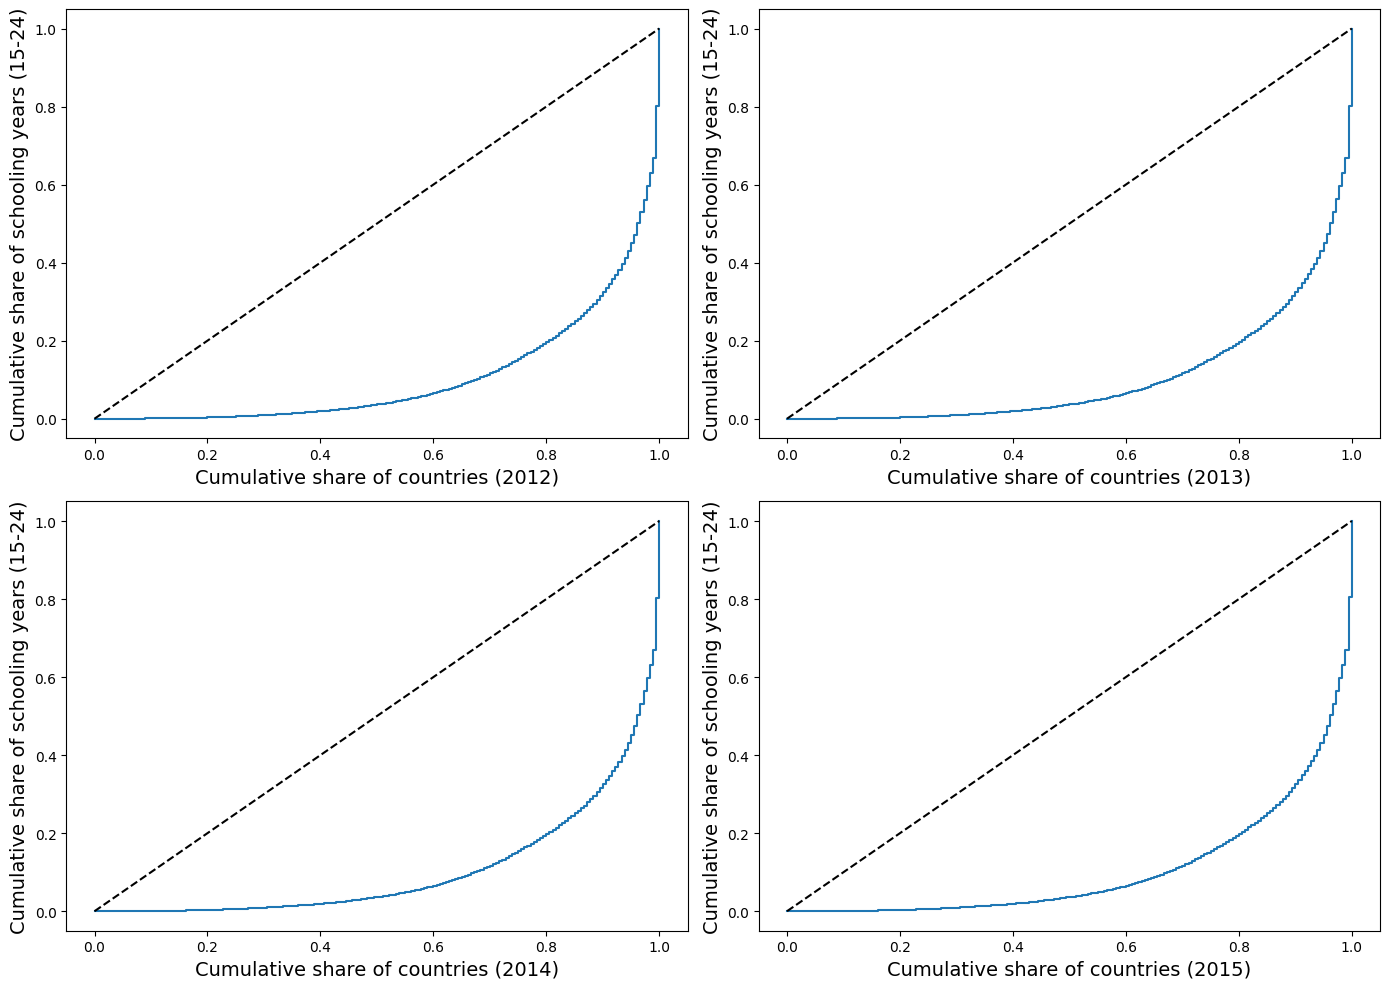

In [337]:
# Create Lorenz curve for each years

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes for Lorenz curves
for i, year in enumerate(historic_unique_years):
    ax = axes[i]
    data = df_historic[df_historic['year'] == year][indicator]
    
    # Compute Lorenz curve
    lorenz_data = generate_ratio_cumulative_data(data)
    ax.plot(np.linspace(0, 1, len(lorenz_data)), lorenz_data, drawstyle='steps-post')
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')  # 45-degree line for equality
    
    ax.set_xlabel(f'Cumulative share of countries ({year})', fontsize=14)
    ax.set_ylabel('Cumulative share of schooling years (15-24)', fontsize=14)


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [338]:
# Get all countries that have a number of people that have access to Internet greater than Q1, for each years
internet_users_countries = []
excluded_countries = set()

for year in historic_unique_years:
    threshold = summary_stats[summary_stats['year'] == year]['25%'].iloc[0]
    excluded_countries.update(df_historic[(df_historic['year'] == year) & (df_historic[indicator] < threshold)]['country'])

# Finding the countries which meet the criteria
internet_users_countries = set(df_historic['country']) - excluded_countries

Analyse du nombre moyenne d'année des scolarisation pour les personnes ayant entre 15 et 19 ans
Plus la valeur du coefficient de variation est grande, plus la dispersion autour de la moyenne est grande.

On peut remarquer que ce coefficient diminue à mesure des années.

Cela est due au fait que la moyenne grandie est que l'écart type diminue.

Donc il y a plus d'individus dans la moyenne et ils sont moins dispersés.

Avec le coefficient de variation, nous pouvons voir que notre distribution est étalé sur la gauche. Et il elle se recentre au fil des années.

La courbe de Lorenz, qui sert à montrer l'égalité entre les individus (ici les pays), nous montre que les inégalités diminuent car l'aire entre la courbe et la droite diminue.

##### PIB par habitant, en parité de pouvoir d'achat

In [339]:
# Define the indicator to use
indicator = 'gdp_ppp'

In [340]:
# Delete countries with Nan values
df_historic = drop_countries_with_no_data(df_historic, indicator)

In [341]:
# Create a beautiful DataFrame from describe method

# Create a list to store individual statistics DataFrames
stats_list = []

# Loop over the unique years and compute descriptive statistics for each year
for year in historic_unique_years:
    stats = df_historic[df_historic['year'] == year][indicator].describe()
    stats['year'] = year
    stats_list.append(stats)

# Concatenate all the individual DataFrames into one and invert columns and rows
summary_stats = pd.concat(stats_list, axis=1).transpose()

# Rearrange columns so that 'year' is the first column
summary_stats = summary_stats[['year'] + [col for col in summary_stats.columns if col != 'year']]

summary_stats

,year,count,mean,std,min,25%,50%,75%,max
gdp_ppp,2012,172.0,568545847806.648926,1854796705247.552002,352476597.279342,21565728539.709476,65254364337.713745,374680431121.95874,16155255000000.0
gdp_ppp,2013,172.0,599805870122.578247,1968307245711.625244,344349073.960827,22768818294.309525,68918136494.086151,392993400100.856262,16788028344180.300781
gdp_ppp,2014,172.0,630441409230.993774,2094458456222.24707,342956842.08548,24191528618.804424,73690079500.452393,403156469884.422241,18335661531200.101562
gdp_ppp,2015,172.0,1316006034513.905518,4440699613689.821289,728987979.522646,50520710183.279297,152349563160.893494,834819005853.800415,39705450955645.796875


In [342]:
# Calculate the coefficient of variation for each year
for year in historic_unique_years: 
    tmp_df = df_historic[df_historic['year'] == year]
    
    standard_deviation = tmp_df[indicator].std()
    mean = tmp_df[indicator].mean()
    
    cv = round(
        standard_deviation / mean * 100,
        4
    )

    print(f"The coeficient of variation for the year {year} is : {cv}")

The coeficient of variation for the year 2012 is : 326.2352
The coeficient of variation for the year 2013 is : 328.1574
The coeficient of variation for the year 2014 is : 332.221
The coeficient of variation for the year 2015 is : 337.4376


In [343]:
# Calculate the skewness for each years
for year in historic_unique_years: 
    tmp_df = df_historic[df_historic['year'] == year]
    
    skew = round(tmp_df[indicator].skew(), 4)

    print(f"The skewness for the year {year} is : {skew}")

The skewness for the year 2012 is : 6.808
The skewness for the year 2013 is : 6.8387
The skewness for the year 2014 is : 6.9192
The skewness for the year 2015 is : 7.0173


In [344]:
first_part_title = "Gross Domestic Product, Purshasing Power Parity"

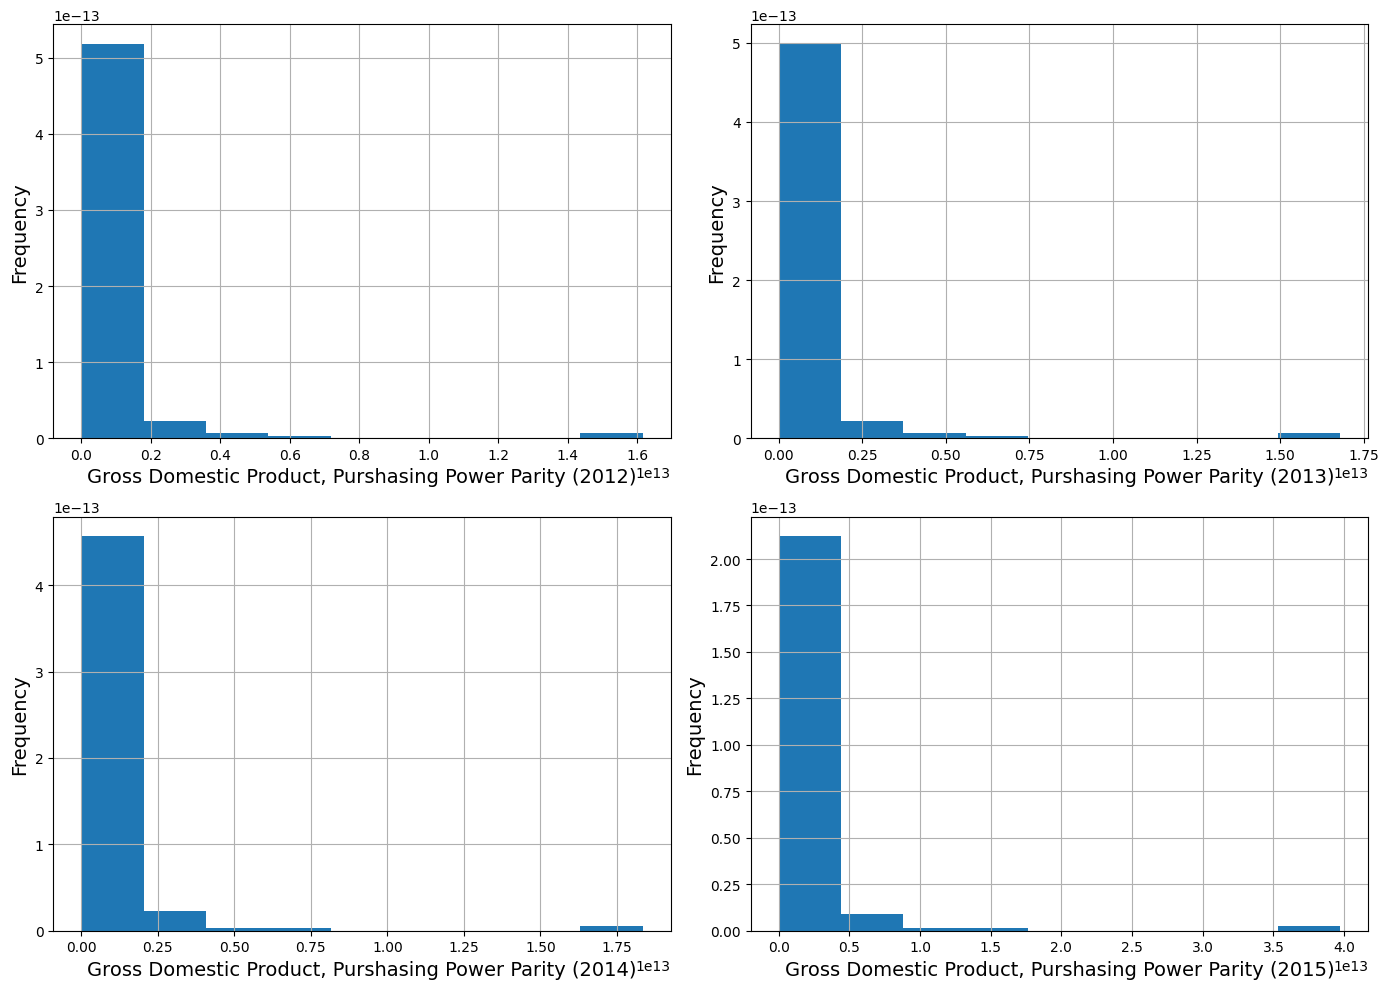

In [345]:
# Create histograms for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(historic_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Calculate number of classes
number_of_rows =  df_historic[df_historic['year'] == '2013'].shape[0]
bins = int(np.ceil(1 + np.log2(number_of_rows)))

# Loop over the years and corresponding axes
for i, year in enumerate(historic_unique_years):

    ax = axes[i]
    data = df_historic[df_historic['year'] == year][indicator]
    data.hist(density=True, bins=bins, ax=ax)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

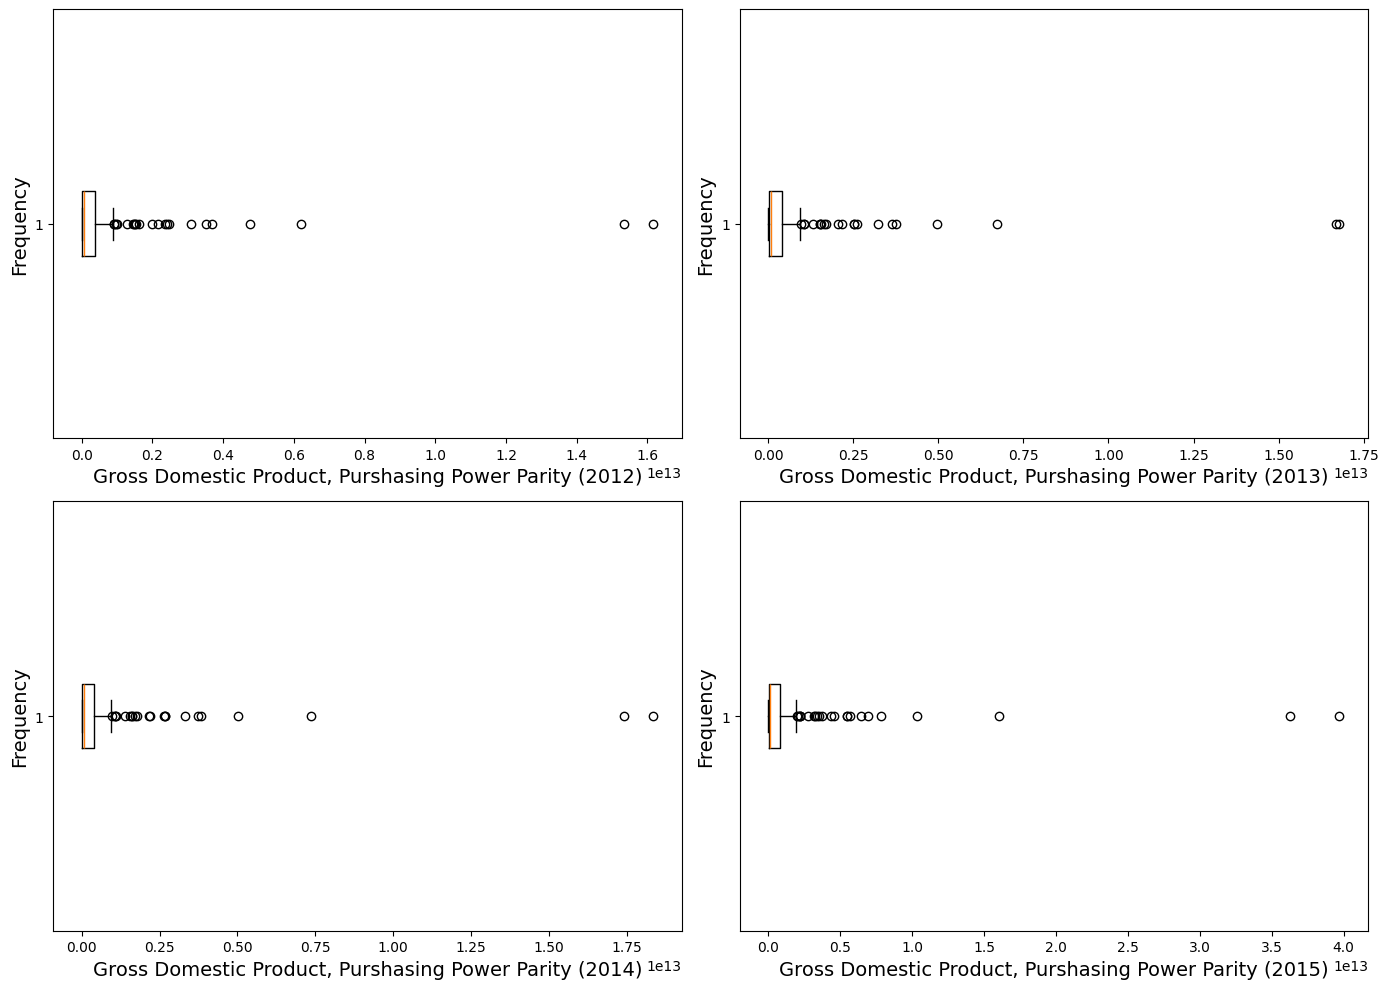

In [346]:
# Create box plot for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(historic_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes
for i, year in enumerate(historic_unique_years):
    ax = axes[i]
    data = df_historic[df_historic['year'] == year][indicator]
    ax.boxplot(data, vert=False)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

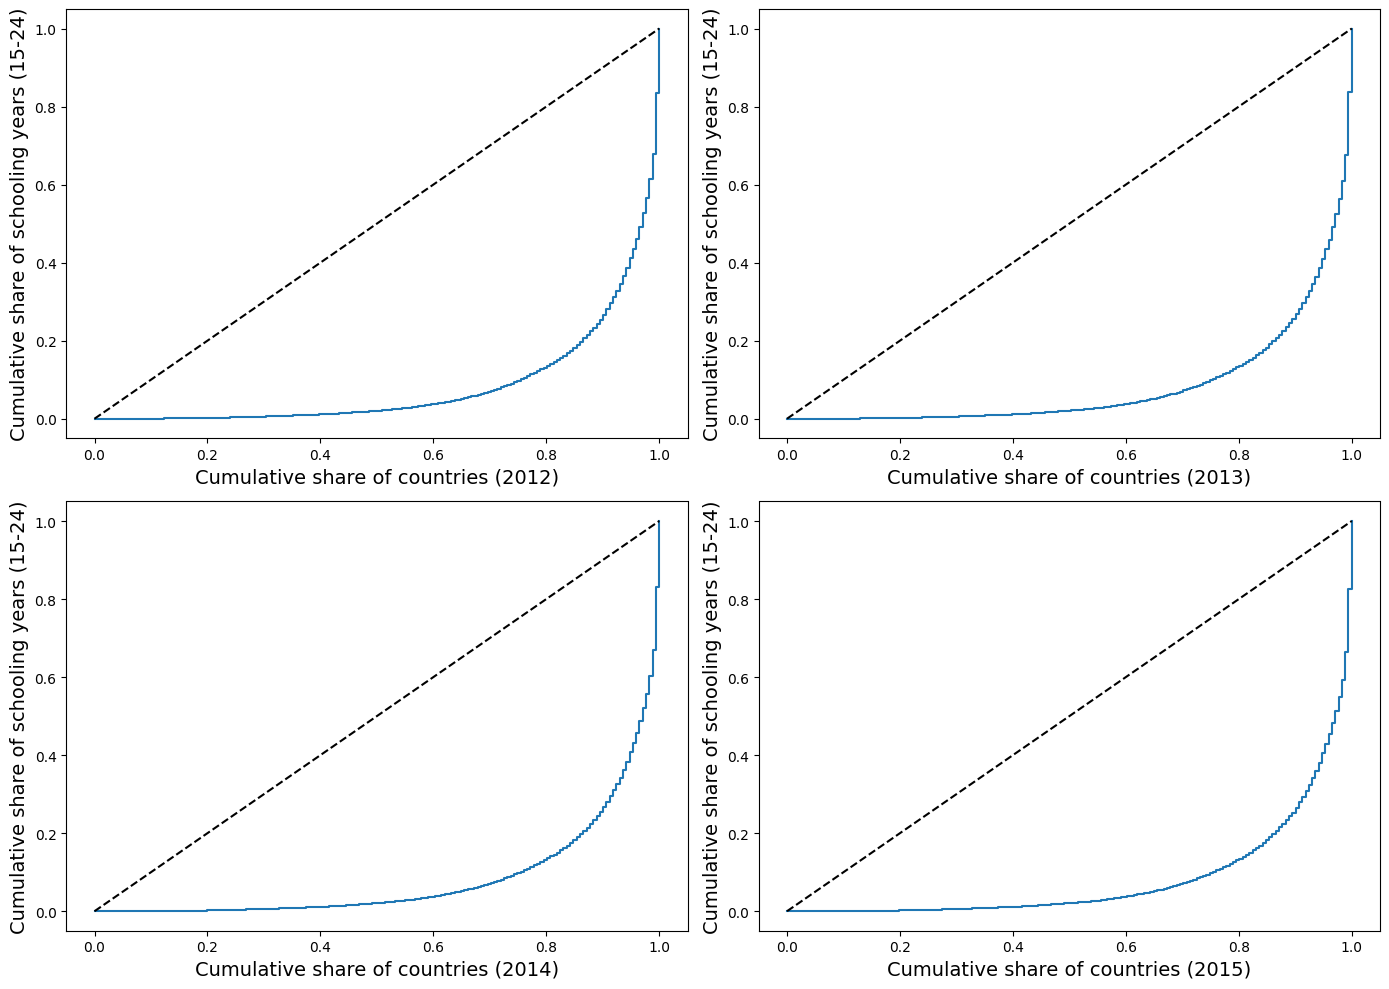

In [347]:
# Create Lorenz curve for each years

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes for Lorenz curves
for i, year in enumerate(historic_unique_years):
    ax = axes[i]
    data = df_historic[df_historic['year'] == year][indicator]
    
    # Compute Lorenz curve
    lorenz_data = generate_ratio_cumulative_data(data)
    ax.plot(np.linspace(0, 1, len(lorenz_data)), lorenz_data, drawstyle='steps-post')
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')  # 45-degree line for equality
    
    ax.set_xlabel(f'Cumulative share of countries ({year})', fontsize=14)
    ax.set_ylabel('Cumulative share of schooling years (15-24)', fontsize=14)


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [348]:
# Get all countries that have a GDP PPP greater than Q1, for each years
gdp_ppp_countries = []
excluded_countries = set()

for year in historic_unique_years:
    threshold = summary_stats[summary_stats['year'] == year]['25%'].iloc[0]
    excluded_countries.update(df_historic[(df_historic['year'] == year) & (df_historic[indicator] < threshold)]['country'])

# Finding the countries which meet the criteria
gdp_ppp_countries = set(df_historic['country']) - excluded_countries

Analyse du nombre moyenne d'année des scolarisation pour les personnes ayant entre 15 et 19 ans
Plus la valeur du coefficient de variation est grande, plus la dispersion autour de la moyenne est grande.

On peut remarquer que ce coefficient diminue à mesure des années.

Cela est due au fait que la moyenne grandie est que l'écart type diminue.

Donc il y a plus d'individus dans la moyenne et ils sont moins dispersés.

Avec le coefficient de variation, nous pouvons voir que notre distribution est étalé sur la gauche. Et il elle se recentre au fil des années.

La courbe de Lorenz, qui sert à montrer l'égalité entre les individus (ici les pays), nous montre que les inégalités diminuent car l'aire entre la courbe et la droite diminue.

##### Nombre de personnes ayant entre 4 et 6 ans

In [349]:
# Define the indicator to use
indicator = 'population_4_6'

In [350]:
# Delete countries with Nan values
df_historic = drop_countries_with_no_data(df_historic, indicator)

In [351]:
# Create a beautiful DataFrame from describe method

# Create a list to store individual statistics DataFrames
stats_list = []

# Loop over the unique years and compute descriptive statistics for each year
for year in historic_unique_years:
    stats = df_historic[df_historic['year'] == year][indicator].describe()
    stats['year'] = year
    stats_list.append(stats)

# Concatenate all the individual DataFrames into one and invert columns and rows
summary_stats = pd.concat(stats_list, axis=1).transpose()

# Rearrange columns so that 'year' is the first column
summary_stats = summary_stats[['year'] + [col for col in summary_stats.columns if col != 'year']]

summary_stats

,year,count,mean,std,min,25%,50%,75%,max
population_4_6,2012,172.0,2146722.848837,7157729.14388,5458.0,125122.5,435080.5,1697014.75,75068187.0
population_4_6,2013,172.0,2161824.726744,7185746.158711,5265.0,130079.0,440059.0,1713804.25,75051089.0
population_4_6,2014,172.0,2176078.19186,7214918.630441,5130.0,129713.0,444838.0,1724811.25,74995471.0
population_4_6,2015,172.0,4376728.406977,14475945.042065,10146.0,257475.0,896406.0,3471747.5,149785814.0


In [352]:
# Calculate the coefficient of variation for each year
for year in historic_unique_years: 
    tmp_df = df_historic[df_historic['year'] == year]
    
    standard_deviation = tmp_df[indicator].std()
    mean = tmp_df[indicator].mean()
    
    cv = round(
        standard_deviation / mean * 100,
        4
    )

    print(f"The coeficient of variation for the year {year} is : {cv}")

The coeficient of variation for the year 2012 is : 333.4259
The coeficient of variation for the year 2013 is : 332.3926
The coeficient of variation for the year 2014 is : 331.556
The coeficient of variation for the year 2015 is : 330.7481


In [353]:
# Calculate the skewness for each years
for year in historic_unique_years: 
    tmp_df = df_historic[df_historic['year'] == year]
    
    skew = round(tmp_df[indicator].skew(), 4)

    print(f"The skewness for the year {year} is : {skew}")

The skewness for the year 2012 is : 8.0836
The skewness for the year 2013 is : 8.0486
The skewness for the year 2014 is : 8.0119
The skewness for the year 2015 is : 7.9769


In [354]:
first_part_title = "Population between 4 and 6 year"

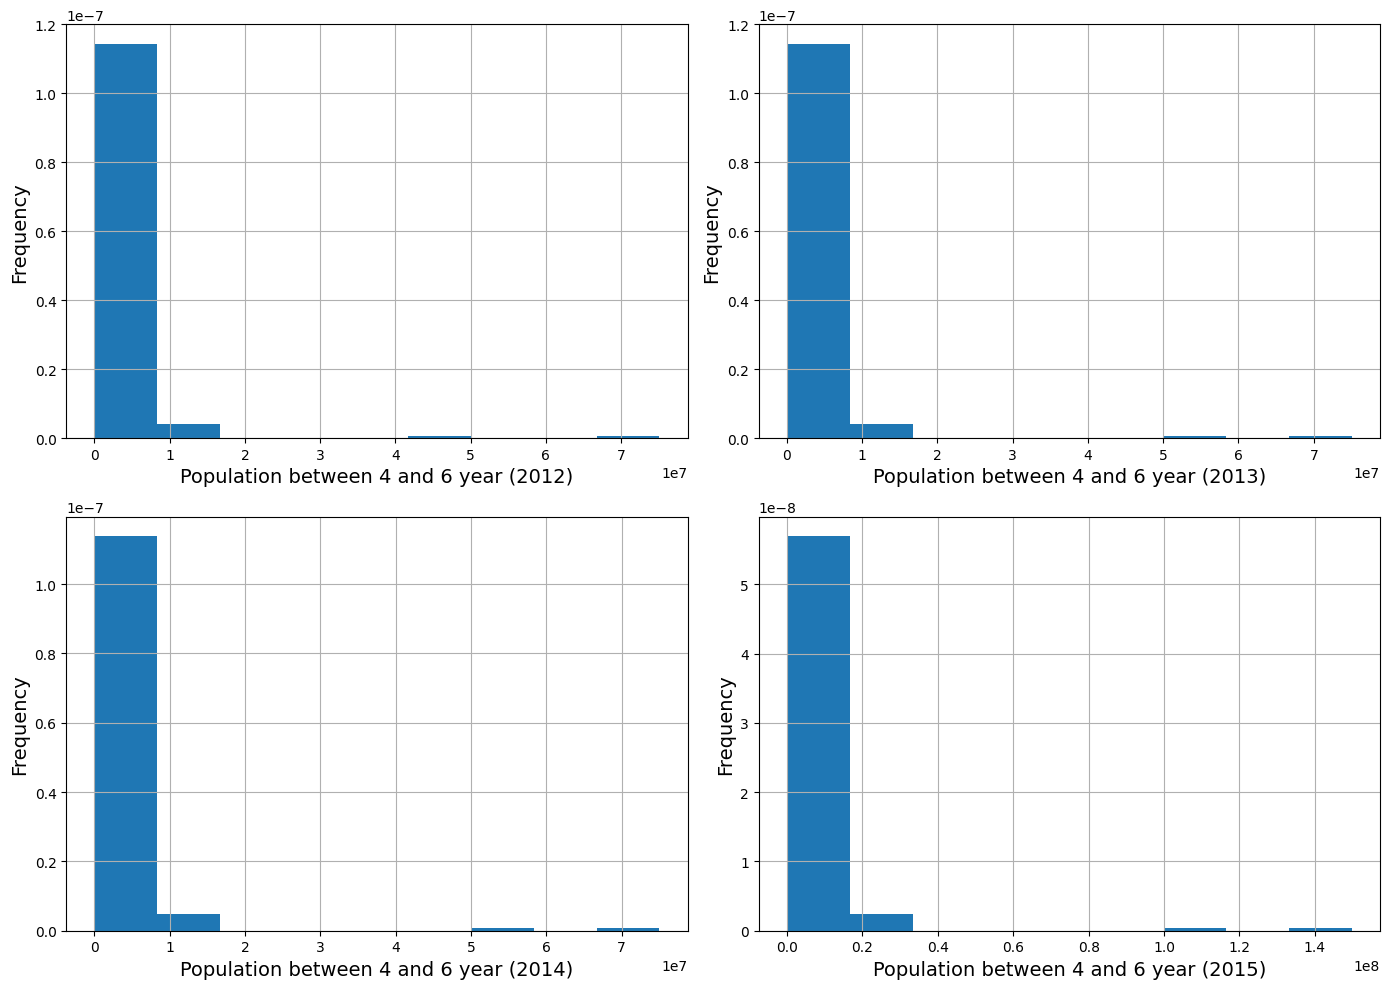

In [355]:
# Create histograms for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(historic_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Calculate number of classes
number_of_rows =  df_historic[df_historic['year'] == '2013'].shape[0]
bins = int(np.ceil(1 + np.log2(number_of_rows)))

# Loop over the years and corresponding axes
for i, year in enumerate(historic_unique_years):

    ax = axes[i]
    data = df_historic[df_historic['year'] == year][indicator]
    data.hist(density=True, bins=bins, ax=ax)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

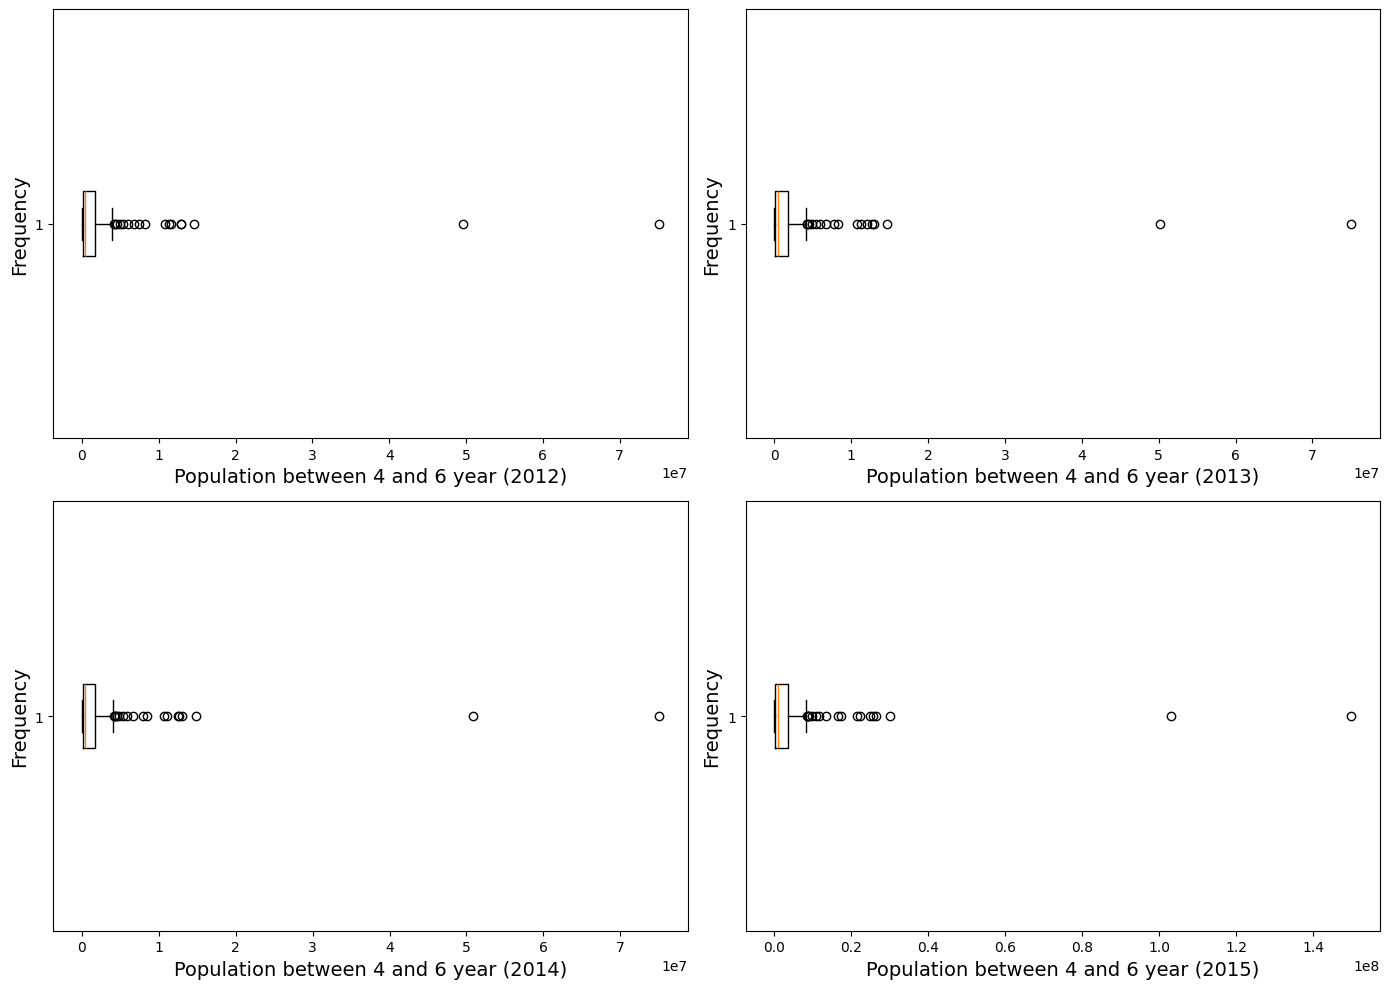

In [356]:
# Create box plot for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(historic_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes
for i, year in enumerate(historic_unique_years):
    ax = axes[i]
    data = df_historic[df_historic['year'] == year][indicator]
    ax.boxplot(data, vert=False)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

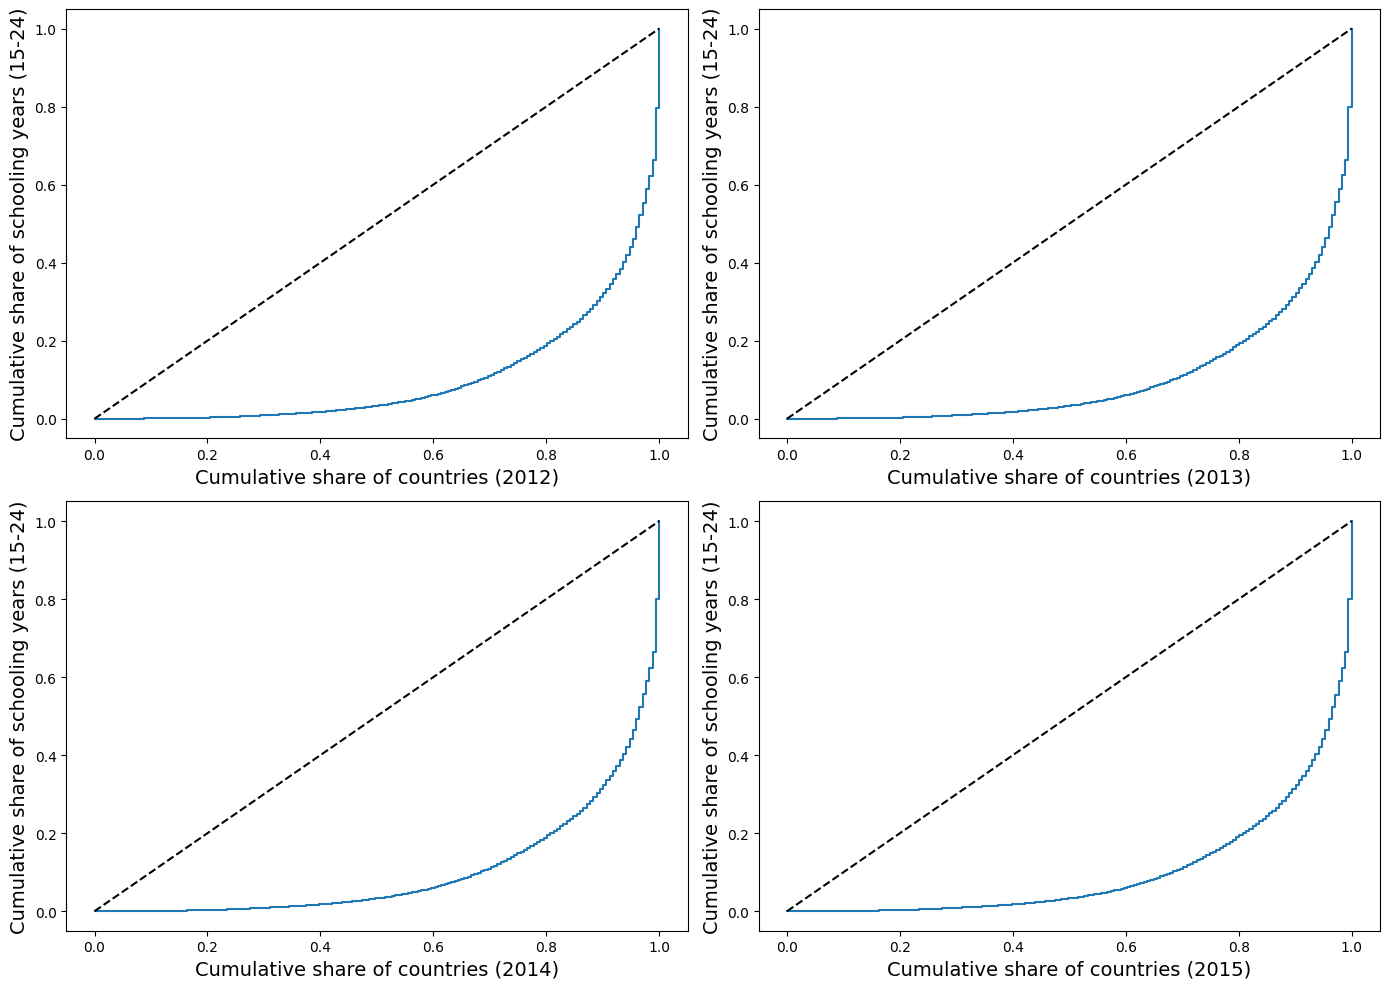

In [357]:
# Create Lorenz curve for each years

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes for Lorenz curves
for i, year in enumerate(historic_unique_years):
    ax = axes[i]
    data = df_historic[df_historic['year'] == year][indicator]
    
    # Compute Lorenz curve
    lorenz_data = generate_ratio_cumulative_data(data)
    ax.plot(np.linspace(0, 1, len(lorenz_data)), lorenz_data, drawstyle='steps-post')
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')  # 45-degree line for equality
    
    ax.set_xlabel(f'Cumulative share of countries ({year})', fontsize=14)
    ax.set_ylabel('Cumulative share of schooling years (15-24)', fontsize=14)


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [358]:
# Get all countries that have a population aged between 4 and 6 year old greater than Q1, for each years
population_4_6_countries = []
excluded_countries = set()

for year in historic_unique_years:
    threshold = summary_stats[summary_stats['year'] == year]['25%'].iloc[0]
    excluded_countries.update(df_historic[(df_historic['year'] == year) & (df_historic[indicator] < threshold)]['country'])

# Finding the countries which meet the criteria
population_4_6_countries = set(df_historic['country']) - excluded_countries

Analyse du nombre moyenne d'année des scolarisation pour les personnes ayant entre 15 et 19 ans
Plus la valeur du coefficient de variation est grande, plus la dispersion autour de la moyenne est grande.

On peut remarquer que ce coefficient diminue à mesure des années.

Cela est due au fait que la moyenne grandie est que l'écart type diminue.

Donc il y a plus d'individus dans la moyenne et ils sont moins dispersés.

Avec le coefficient de variation, nous pouvons voir que notre distribution est étalé sur la gauche. Et il elle se recentre au fil des années.

La courbe de Lorenz, qui sert à montrer l'égalité entre les individus (ici les pays), nous montre que les inégalités diminuent car l'aire entre la courbe et la droite diminue.

##### Nombre de personnes ayant entre 6 et 10 ans

In [359]:
# Define the indicator to use
indicator = 'population_6_10'

In [360]:
# Delete countries with Nan values
df_historic = drop_countries_with_no_data(df_historic, indicator)

In [361]:
# Create a beautiful DataFrame from describe method

# Create a list to store individual statistics DataFrames
stats_list = []

# Loop over the unique years and compute descriptive statistics for each year
for year in historic_unique_years:
    stats = df_historic[df_historic['year'] == year][indicator].describe()
    stats['year'] = year
    stats_list.append(stats)

# Concatenate all the individual DataFrames into one and invert columns and rows
summary_stats = pd.concat(stats_list, axis=1).transpose()

# Rearrange columns so that 'year' is the first column
summary_stats = summary_stats[['year'] + [col for col in summary_stats.columns if col != 'year']]

summary_stats

,year,count,mean,std,min,25%,50%,75%,max
population_6_10,2012,172.0,3504297.162791,11925356.524375,9830.0,212379.5,698952.5,2749325.0,124416812.0
population_6_10,2013,172.0,3523876.674419,11921122.843727,9449.0,209704.75,712892.5,2763323.75,124478532.0
population_6_10,2014,172.0,3544664.122093,11927022.377112,9135.0,205705.75,724238.0,2768993.5,124515382.0
population_6_10,2015,172.0,7130664.337209,23877986.03712,17806.0,424016.5,1457059.0,5597448.0,249000228.0


In [362]:
# Calculate the coefficient of variation for each year
for year in historic_unique_years: 
    tmp_df = df_historic[df_historic['year'] == year]
    
    standard_deviation = tmp_df[indicator].std()
    mean = tmp_df[indicator].mean()
    
    cv = round(
        standard_deviation / mean * 100,
        4
    )

    print(f"The coeficient of variation for the year {year} is : {cv}")

The coeficient of variation for the year 2012 is : 340.3067
The coeficient of variation for the year 2013 is : 338.2957
The coeficient of variation for the year 2014 is : 336.4782
The coeficient of variation for the year 2015 is : 334.8634


In [363]:
# Calculate the skewness for each years
for year in historic_unique_years: 
    tmp_df = df_historic[df_historic['year'] == year]
    
    skew = round(tmp_df[indicator].skew(), 4)

    print(f"The skewness for the year {year} is : {skew}")

The skewness for the year 2012 is : 8.121
The skewness for the year 2013 is : 8.1071
The skewness for the year 2014 is : 8.0885
The skewness for the year 2015 is : 8.0657


In [364]:
first_part_title = "Population between 6 and 10 year"

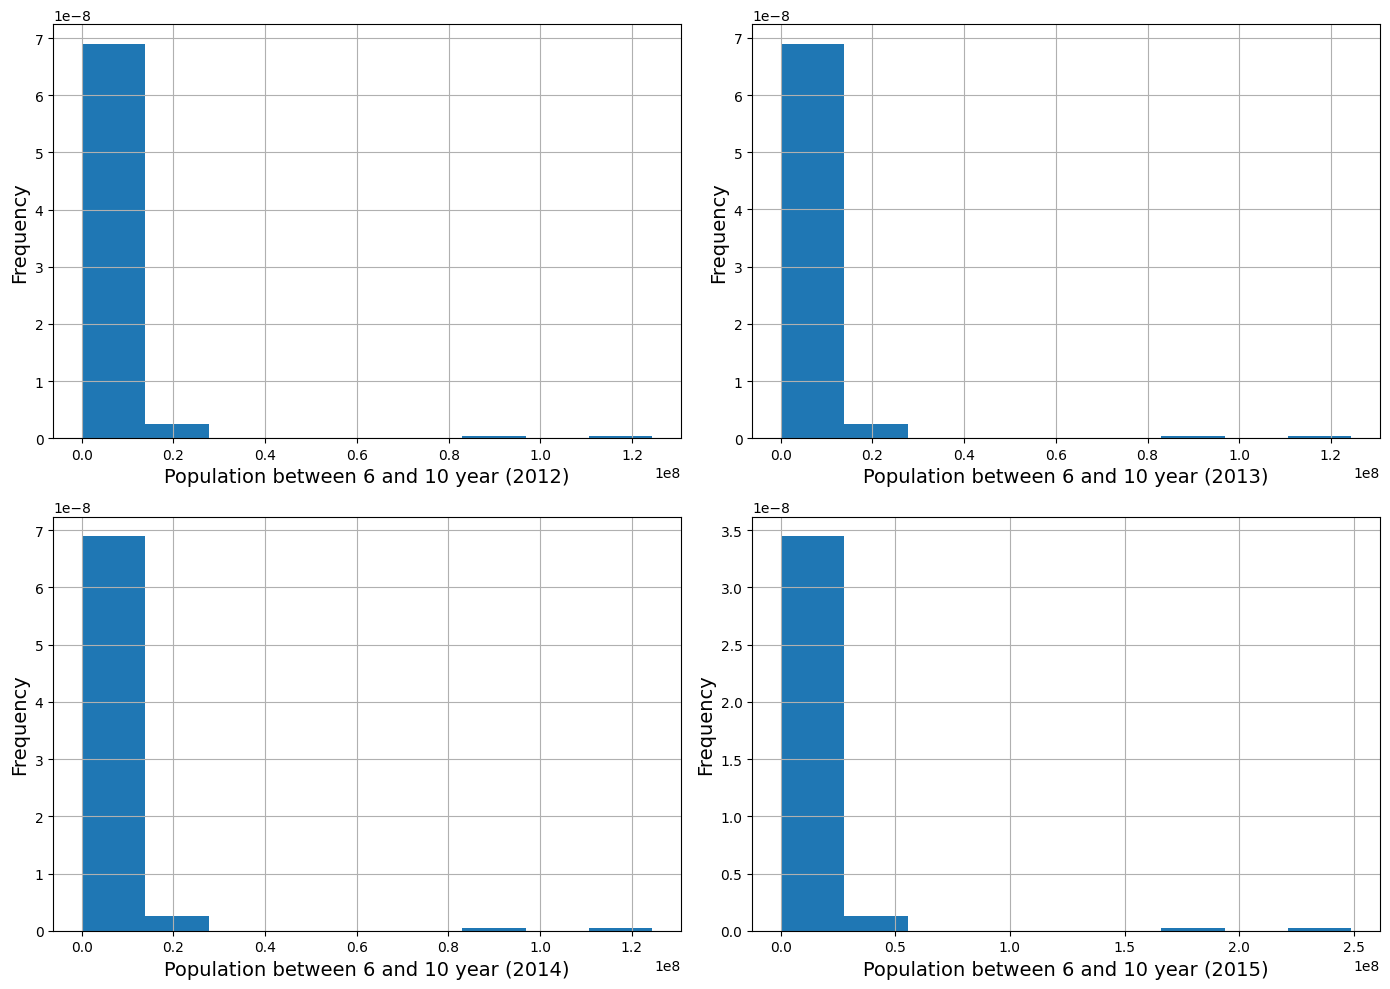

In [365]:
# Create histograms for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(historic_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Calculate number of classes
number_of_rows =  df_historic[df_historic['year'] == '2013'].shape[0]
bins = int(np.ceil(1 + np.log2(number_of_rows)))

# Loop over the years and corresponding axes
for i, year in enumerate(historic_unique_years):

    ax = axes[i]
    data = df_historic[df_historic['year'] == year][indicator]
    data.hist(density=True, bins=bins, ax=ax)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

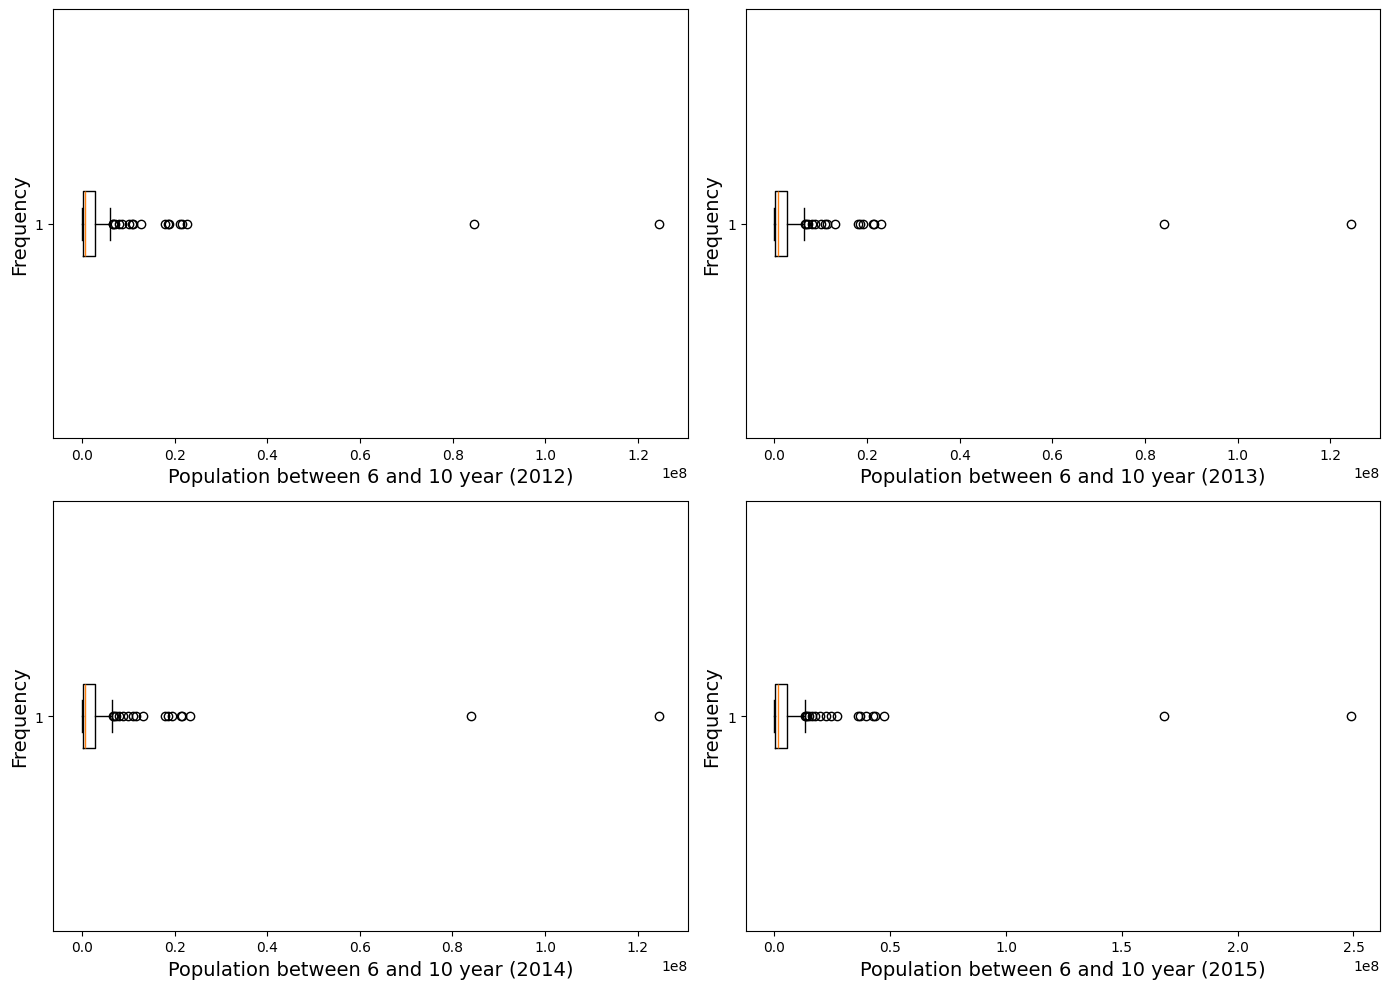

In [366]:
# Create box plot for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(historic_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes
for i, year in enumerate(historic_unique_years):
    ax = axes[i]
    data = df_historic[df_historic['year'] == year][indicator]
    ax.boxplot(data, vert=False)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

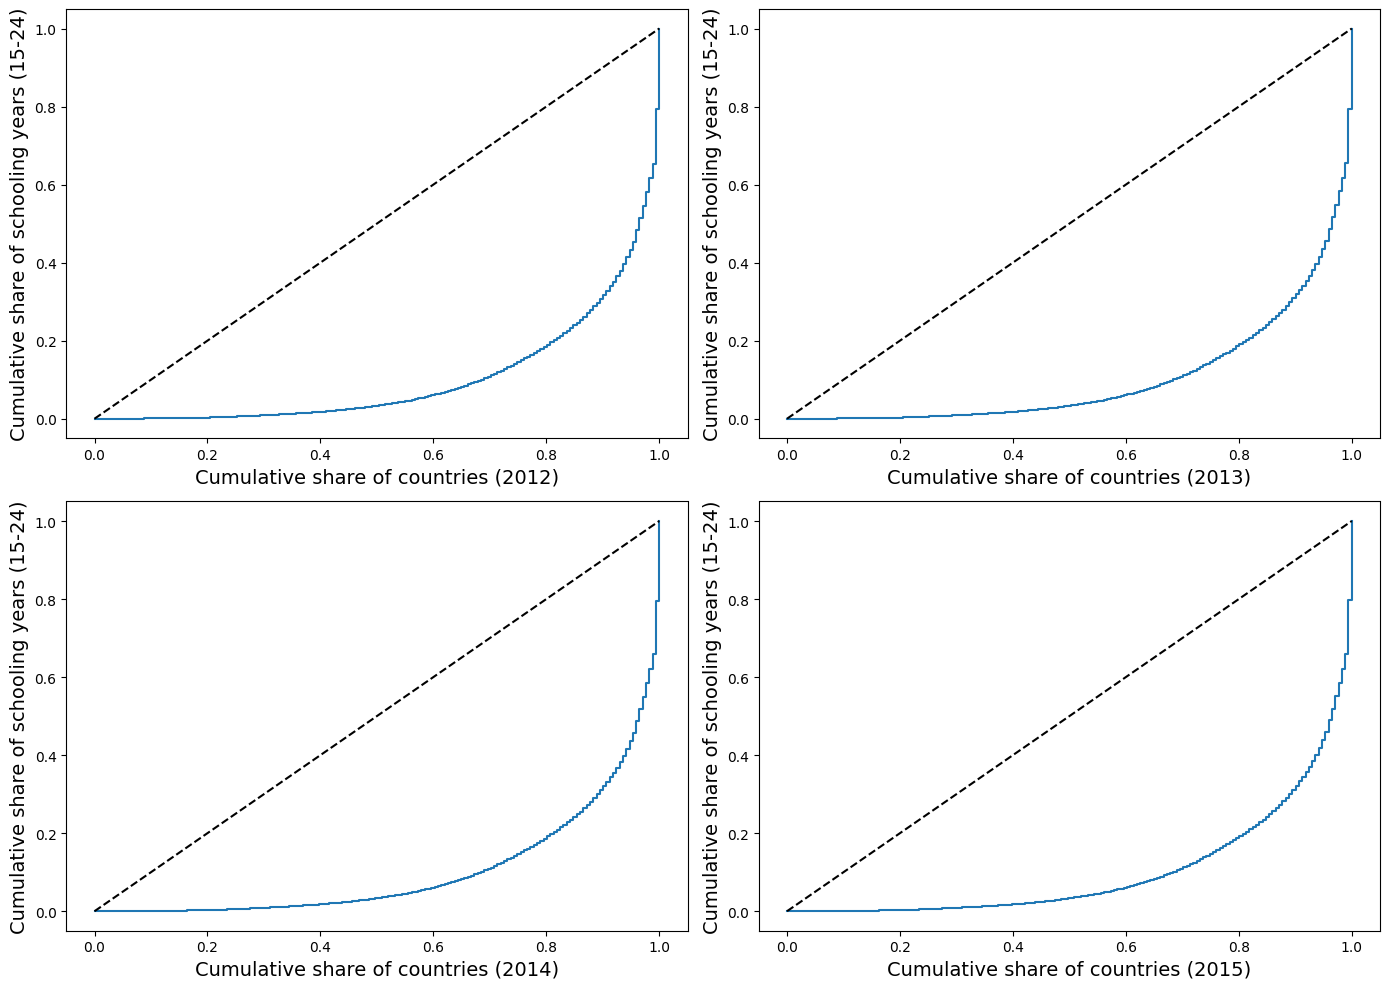

In [367]:
# Create Lorenz curve for each years

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes for Lorenz curves
for i, year in enumerate(historic_unique_years):
    ax = axes[i]
    data = df_historic[df_historic['year'] == year][indicator]
    
    # Compute Lorenz curve
    lorenz_data = generate_ratio_cumulative_data(data)
    ax.plot(np.linspace(0, 1, len(lorenz_data)), lorenz_data, drawstyle='steps-post')
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')  # 45-degree line for equality
    
    ax.set_xlabel(f'Cumulative share of countries ({year})', fontsize=14)
    ax.set_ylabel('Cumulative share of schooling years (15-24)', fontsize=14)


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [368]:
# Get all countries that have a population aged between 4 and 6 year old greater than Q1, for each years
population_6_10_countries = []
excluded_countries = set()

for year in historic_unique_years:
    threshold = summary_stats[summary_stats['year'] == year]['25%'].iloc[0]
    excluded_countries.update(df_historic[(df_historic['year'] == year) & (df_historic[indicator] < threshold)]['country'])

# Finding the countries which meet the criteria
population_6_10_countries = set(df_historic['country']) - excluded_countries

Analyse du nombre moyenne d'année des scolarisation pour les personnes ayant entre 15 et 19 ans
Plus la valeur du coefficient de variation est grande, plus la dispersion autour de la moyenne est grande.

On peut remarquer que ce coefficient diminue à mesure des années.

Cela est due au fait que la moyenne grandie est que l'écart type diminue.

Donc il y a plus d'individus dans la moyenne et ils sont moins dispersés.

Avec le coefficient de variation, nous pouvons voir que notre distribution est étalé sur la gauche. Et il elle se recentre au fil des années.

La courbe de Lorenz, qui sert à montrer l'égalité entre les individus (ici les pays), nous montre que les inégalités diminuent car l'aire entre la courbe et la droite diminue.

##### Nombre de personnes ayany entre 10 et 16 ans

In [369]:
# Define the indicator to use
indicator = 'population_10_16'

In [370]:
# Delete countries with Nan values
df_historic = drop_countries_with_no_data(df_historic, indicator)

In [371]:
# Create a beautiful DataFrame from describe method

# Create a list to store individual statistics DataFrames
stats_list = []

# Loop over the unique years and compute descriptive statistics for each year
for year in historic_unique_years:
    stats = df_historic[df_historic['year'] == year][indicator].describe()
    stats['year'] = year
    stats_list.append(stats)

# Concatenate all the individual DataFrames into one and invert columns and rows
summary_stats = pd.concat(stats_list, axis=1).transpose()

# Rearrange columns so that 'year' is the first column
summary_stats = summary_stats[['year'] + [col for col in summary_stats.columns if col != 'year']]

summary_stats

,year,count,mean,std,min,25%,50%,75%,max
population_10_16,2012,172.0,4827969.203488,17010785.961541,14694.0,317011.75,958086.0,3787783.75,173270495.0
population_10_16,2013,172.0,4829491.703488,16899584.165116,14736.0,315620.5,956037.5,3810743.25,173248980.0
population_10_16,2014,172.0,4836108.27907,16804150.783001,14818.0,309339.25,965552.0,3812694.25,173214768.0
population_10_16,2015,172.0,9695949.546512,33460259.97869,29262.0,601499.0,1933980.0,7637054.5,346413262.0


In [372]:
# Calculate the coefficient of variation for each year
for year in historic_unique_years: 
    tmp_df = df_historic[df_historic['year'] == year]
    
    standard_deviation = tmp_df[indicator].std()
    mean = tmp_df[indicator].mean()
    
    cv = round(
        standard_deviation / mean * 100,
        4
    )

    print(f"The coeficient of variation for the year {year} is : {cv}")

The coeficient of variation for the year 2012 is : 352.3383
The coeficient of variation for the year 2013 is : 349.9247
The coeficient of variation for the year 2014 is : 347.4726
The coeficient of variation for the year 2015 is : 345.0952


In [373]:
# Calculate the skewness for each years
for year in historic_unique_years: 
    tmp_df = df_historic[df_historic['year'] == year]
    
    skew = round(tmp_df[indicator].skew(), 4)

    print(f"The skewness for the year {year} is : {skew}")

The skewness for the year 2012 is : 8.1168
The skewness for the year 2013 is : 8.1212
The skewness for the year 2014 is : 8.1229
The skewness for the year 2015 is : 8.1217


In [374]:
first_part_title = "Population between 10 and 16 year"

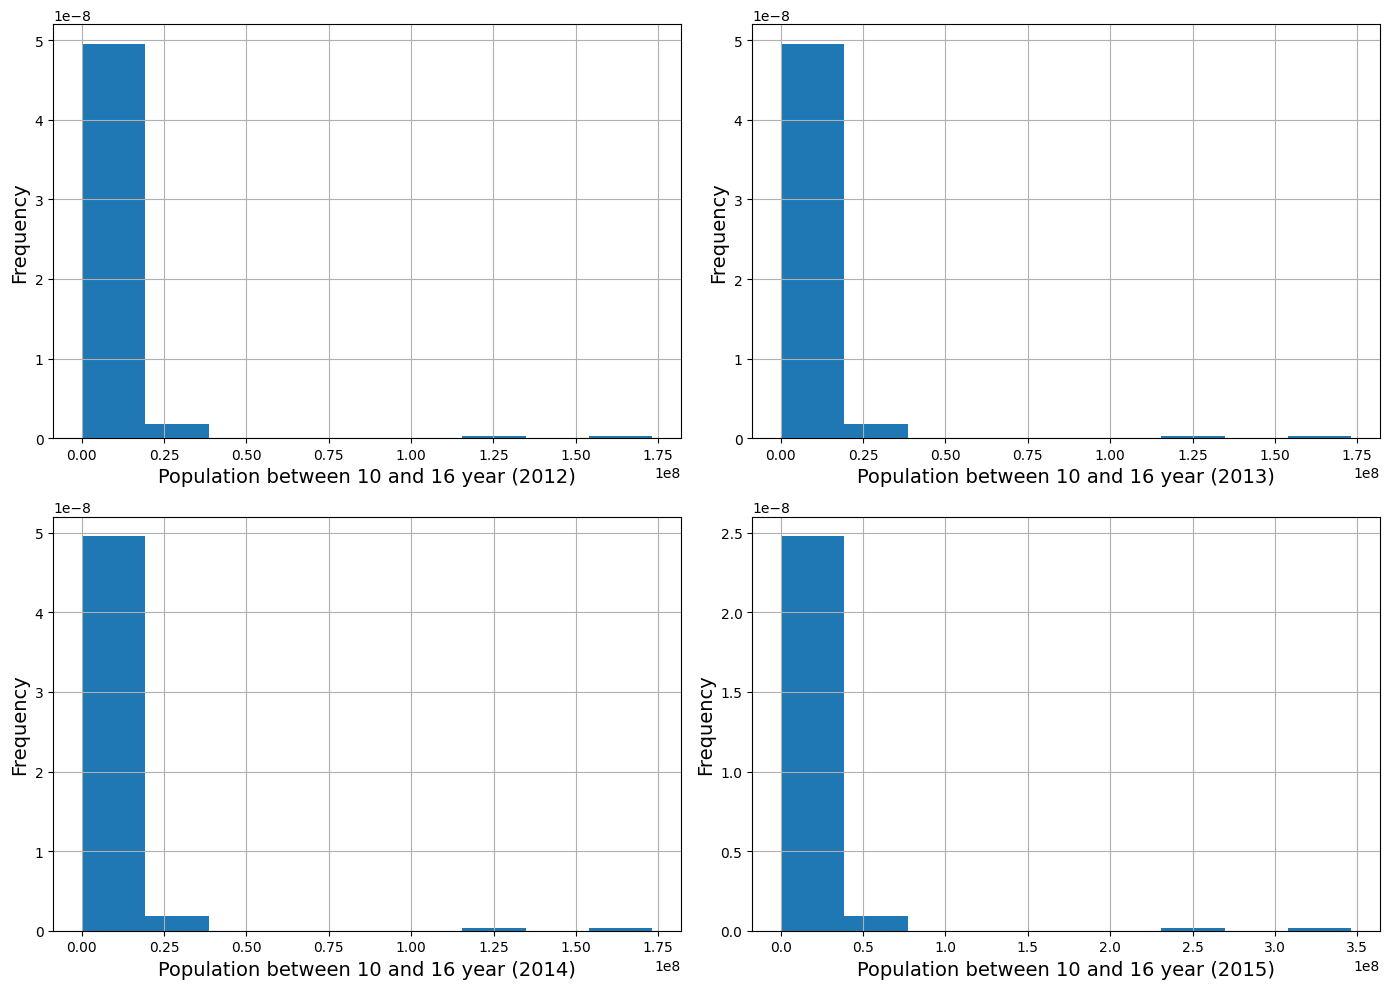

In [375]:
# Create histograms for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(historic_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Calculate number of classes
number_of_rows =  df_historic[df_historic['year'] == '2013'].shape[0]
bins = int(np.ceil(1 + np.log2(number_of_rows)))

# Loop over the years and corresponding axes
for i, year in enumerate(historic_unique_years):

    ax = axes[i]
    data = df_historic[df_historic['year'] == year][indicator]
    data.hist(density=True, bins=bins, ax=ax)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

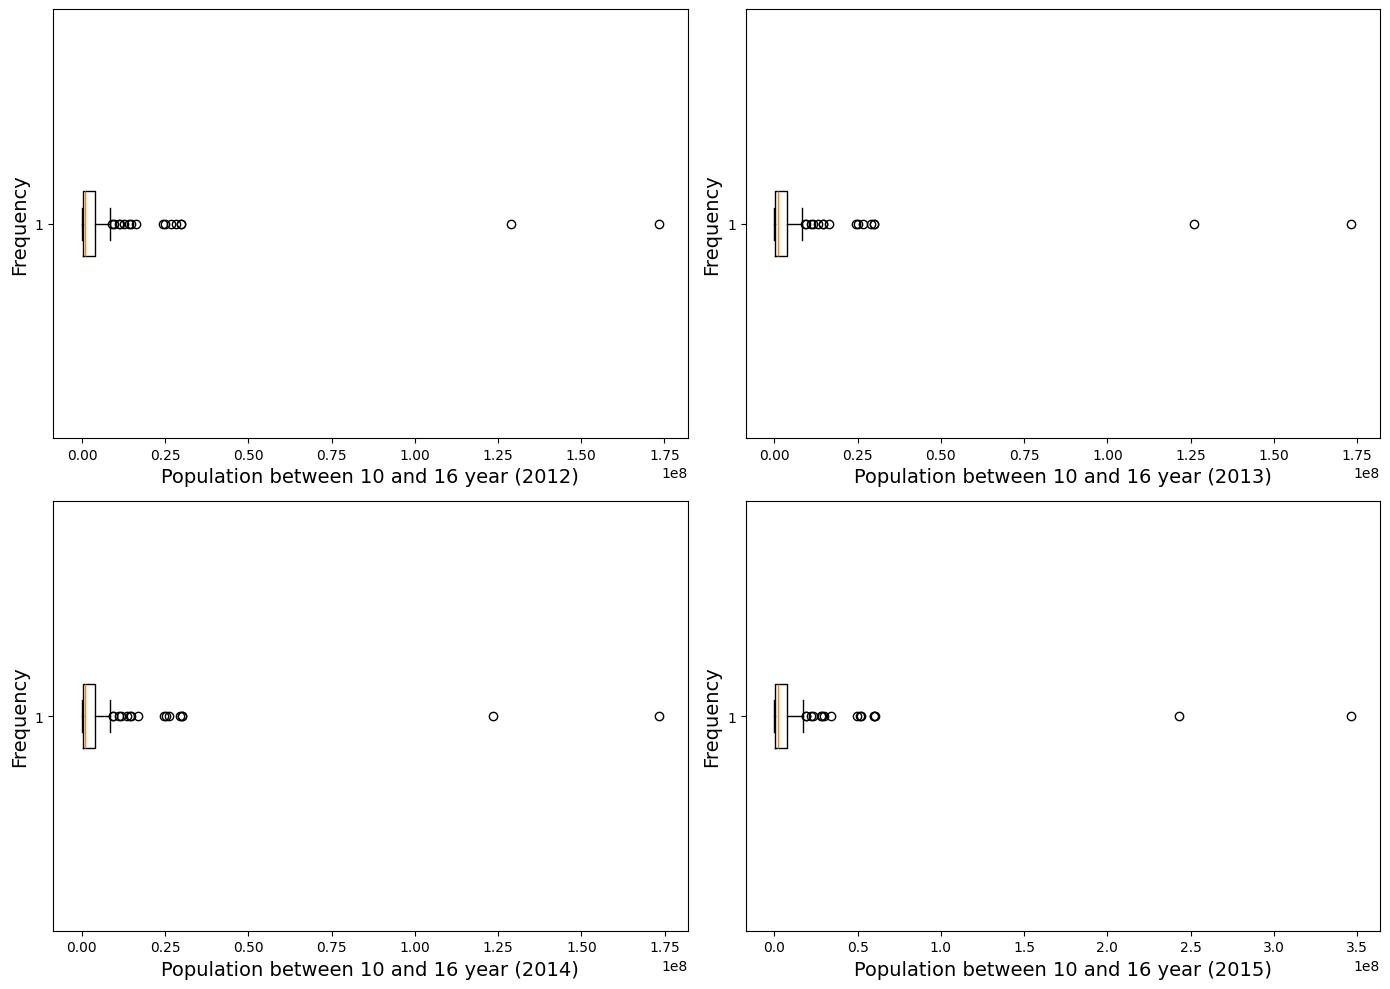

In [376]:
# Create box plot for each years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(historic_unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes
for i, year in enumerate(historic_unique_years):
    ax = axes[i]
    data = df_historic[df_historic['year'] == year][indicator]
    ax.boxplot(data, vert=False)
    ax.set_xlabel(generate_xlabel(first_part_title, year), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

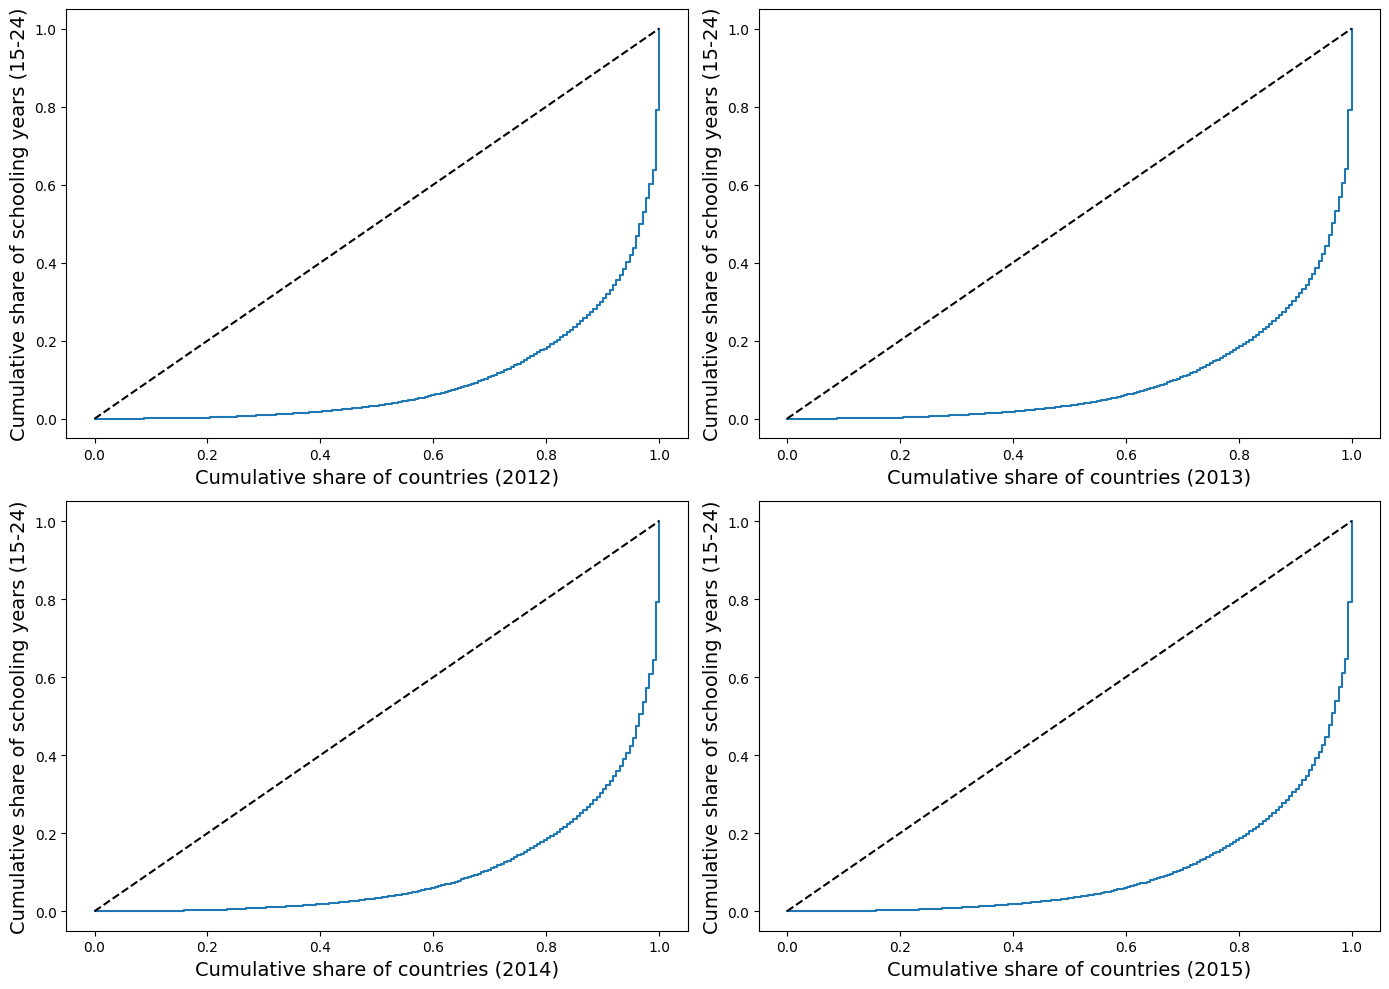

In [377]:
# Create Lorenz curve for each years

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes for Lorenz curves
for i, year in enumerate(historic_unique_years):
    ax = axes[i]
    data = df_historic[df_historic['year'] == year][indicator]
    
    # Compute Lorenz curve
    lorenz_data = generate_ratio_cumulative_data(data)
    ax.plot(np.linspace(0, 1, len(lorenz_data)), lorenz_data, drawstyle='steps-post')
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')  # 45-degree line for equality
    
    ax.set_xlabel(f'Cumulative share of countries ({year})', fontsize=14)
    ax.set_ylabel('Cumulative share of schooling years (15-24)', fontsize=14)


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [378]:
# Get all countries that have a population aged between 4 and 6 year old greater than Q1, for each years
population_10_16_countries = []
excluded_countries = set()

for year in historic_unique_years:
    threshold = summary_stats[summary_stats['year'] == year]['25%'].iloc[0]
    excluded_countries.update(df_historic[(df_historic['year'] == year) & (df_historic[indicator] < threshold)]['country'])

# Finding the countries which meet the criteria
population_10_16_countries = set(df_historic['country']) - excluded_countries

Analyse du nombre moyenne d'année des scolarisation pour les personnes ayant entre 15 et 19 ans
Plus la valeur du coefficient de variation est grande, plus la dispersion autour de la moyenne est grande.

On peut remarquer que ce coefficient diminue à mesure des années.

Cela est due au fait que la moyenne grandie est que l'écart type diminue.

Donc il y a plus d'individus dans la moyenne et ils sont moins dispersés.

Avec le coefficient de variation, nous pouvons voir que notre distribution est étalé sur la gauche. Et il elle se recentre au fil des années.

La courbe de Lorenz, qui sert à montrer l'égalité entre les individus (ici les pays), nous montre que les inégalités diminuent car l'aire entre la courbe et la droite diminue.

#### Analyse bivariée

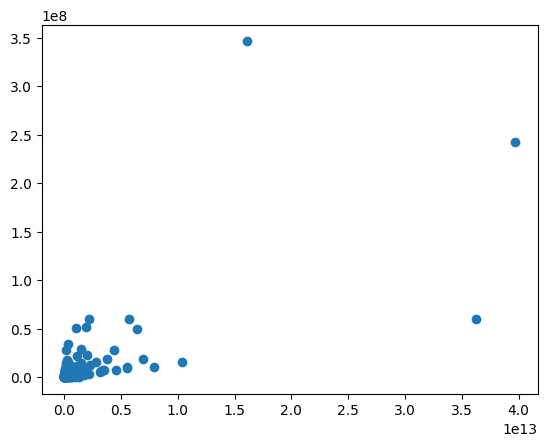

In [379]:
plt.scatter(df_historic[df_historic['year'] == '2015']['gdp_ppp'], df_historic[df_historic['year'] == '2015']['population_10_16'])
plt.show()

In [380]:
cols = [c for c in df_historic[df_historic['year']=='2015'].columns if c != "country" and c != "year"]
matrix = df_historic[df_historic['year']=='2015'][cols].corr()

<Axes: >

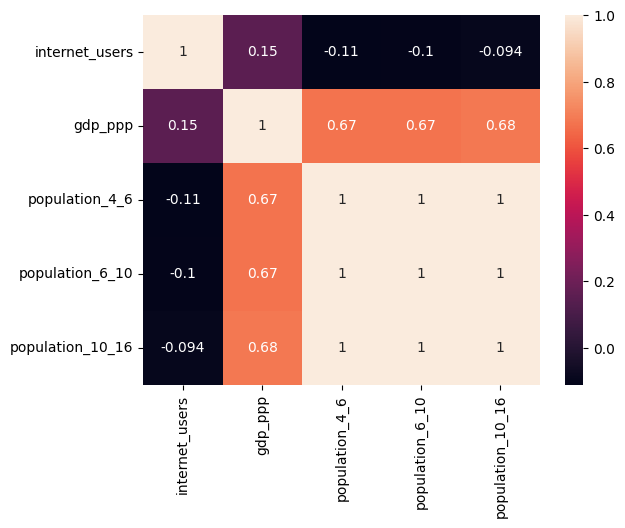

In [381]:
import seaborn as sns
sns.heatmap(matrix, annot=True)

## Set countries

In [410]:
sets_list = [mean_years_school_15_19_countries,
             mean_years_school_20_24_countries,
             mean_years_school_25_29_countries,
             internet_users_countries,
             gdp_ppp_countries,
             population_4_6_countries,
             population_6_10_countries,
             population_10_16_countries,
             ]
common_countries = set.intersection(*sets_list)
print(common_countries)
len(common_countries)

# Initialize an empty set to collect unique countries
unique_countries = set()

# Iterate over each list in sets_list and update the set with countries
for country_list in sets_list:
    unique_countries.update(country_list)

# Convert the set back to a list if needed
unique_countries_list = list(unique_countries)

unique_countries_list.remove("Syrian Arab Republic")
unique_countries_list.remove("Serbia")
unique_countries_list.remove("Libya")

# items to be removed
unwanted_num = {'Venezuela, RB', 'Cuba', 'Eritrea', 'Korea, Dem. People’s Rep.', 'Montenegro', 'Aruba', 'West Bank and Gaza', 'French Polynesia', 'Puerto Rico', 'Somalia', 'New Caledonia'}
 
unique_countries_list = [ele for ele in unique_countries_list if ele not in unwanted_num]

{'Belgium', 'Bolivia', 'Canada', 'Hungary', 'Albania', 'Tunisia', 'Sweden', 'Nepal', 'United Arab Emirates', 'Turkmenistan', 'Jordan', 'Saudi Arabia', 'New Zealand', 'Bulgaria', 'Ukraine', 'Belarus', 'Greece', 'Zimbabwe', 'Iran, Islamic Rep.', 'Hong Kong SAR, China', 'Iraq', 'Costa Rica', 'Nigeria', 'China', 'Argentina', 'Egypt, Arab Rep.', 'United Kingdom', 'Algeria', 'Philippines', 'Finland', 'France', 'Mexico', 'Ecuador', 'Indonesia', 'Kazakhstan', 'Switzerland', 'Poland', 'Myanmar', 'Paraguay', 'Japan', 'Thailand', 'Mongolia', 'Israel', 'Brazil', 'Netherlands', 'Czech Republic', 'Austria', 'Malaysia', 'Italy', 'Slovak Republic', 'El Salvador', 'Turkey', 'Spain', 'Vietnam', 'Colombia', 'Azerbaijan', 'Denmark', 'Russian Federation', 'Australia', 'United States', 'Uruguay', 'Romania', 'Ireland', 'Dominican Republic', 'India', 'Portugal', 'Chile', 'Lebanon', 'Germany', 'South Africa', 'Norway', 'Panama', 'Korea, Rep.', 'Peru'}


In [398]:
df_historic.head()

,country,year,internet_users,gdp_ppp,population_4_6,population_6_10,population_10_16
0,Afghanistan,2012,5.454545,5.750013e+10,3101594.0,4685374.0,5721865.0
1,Afghanistan,2013,5.900000,5.957345e+10,3200372.0,4822912.0,5875272.0
2,Afghanistan,2014,7.000000,6.143594e+10,3299159.0,4961883.0,6027164.0
3,Afghanistan,2015,16.520000,1.258353e+11,6793096.0,10205594.0,12364832.0
4,Albania,2012,54.655959,3.053034e+10,149537.0,248566.0,366225.0


In [399]:
filtered_countries_historic = df_historic[df_historic['country'].isin(unique_countries_list)]
# filtered_countries_historic[filtered_countries_historic.country.isin(['Zimbabwe', "United States", 'Norway'])]

In [404]:
rank = []
df = filtered_countries_historic[filtered_countries_historic['year'] == '2012']
df['rank1'] = filtered_countries_historic[filtered_countries_historic['year'] == '2012']['gdp_ppp'].rank(ascending=False)
df = df.sort_values(by='internet_users')
for index, row in df.iterrows():
    rank.append({'country': row['country'], 'year': row['year'], 'indicator': row['internet_users'], 'rank': row['rank1']})
# print(rank)
filtered_data = [individual for individual in rank if individual["country"] == "Syrian Arab Republic"]
for f in filtered_data:
    print(f)


/var/folders/jw/7s6k1pd17nj7rvp321jl59sm0000gn/T/ipykernel_58912/199582838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rank1'] = filtered_countries_historic[filtered_countries_historic['year'] == '2012']['gdp_ppp'].rank(ascending=False)


In [413]:
rank = []
historical_indicators = filtered_countries_historic.columns.values[2:]
for year in historic_unique_years:
    tmp_df = filtered_countries_historic[filtered_countries_historic['year'] == year]
    for indi in historical_indicators:
        tmp_df = tmp_df.sort_values(by=indi)
        tmp_df['rank'] = tmp_df[tmp_df['year'] == year][indi].rank(ascending=False)
        for index, row in tmp_df.iterrows():
            rank.append({'country': row['country'], 'year': year, 'indicator': indi, 'rank': row['rank']})

# print(len(rank))
filtered_data = [individual for individual in rank if individual["country"] == "Syrian Arab Republic"]
print(filtered_data)
# for f in filtered_data:
#     print(f)
mean_ranks = []
print(unique_countries_list)
for country in unique_countries_list:
    tmp_list = [individual for individual in rank if individual["country"] == country]
    number_ligns = len(tmp_list)
    if number_ligns == 0:
        print(country, number_ligns)
    sum_rank = []
    sum_rank = sum(item['rank'] for item in tmp_list)
    mean_rank = sum_rank / number_ligns
    mean_ranks.append({'country': country, 'mean_rank': mean_rank})
    
    
sorted_mean_rank = sorted(mean_ranks, key=lambda x: x['mean_rank'])
sorted_mean_rank

[]
['Belgium', 'Kuwait', 'Burkina Faso', 'Macedonia, FYR', 'Nepal', 'Bosnia and Herzegovina', 'Ethiopia', 'New Zealand', 'Bulgaria', 'Rwanda', "Cote d'Ivoire", 'Zimbabwe', 'Hong Kong SAR, China', 'Sudan', 'Botswana', 'Lithuania', 'Mozambique', 'Indonesia', 'Morocco', 'Japan', 'Guyana', 'Gambia, The', 'Czech Republic', 'Spain', 'Vanuatu', 'Colombia', 'Congo, Dem. Rep.', 'Haiti', 'Lebanon', 'Germany', 'Croatia', 'Norway', 'Australia', 'Singapore', 'Bolivia', 'Canada', 'Hungary', 'Albania', 'Tunisia', 'Yemen, Rep.', 'United Arab Emirates', 'Tanzania', 'Niger', 'Armenia', 'Mauritius', 'Bahamas, The', 'China', 'Lao PDR', 'Argentina', 'Egypt, Arab Rep.', 'United Kingdom', 'Finland', 'Bahrain', 'Timor-Leste', 'Kazakhstan', 'Swaziland', 'Switzerland', 'Myanmar', 'Latvia', 'Brazil', 'Netherlands', 'Austria', 'Malaysia', 'Brunei Darussalam', 'Maldives', 'Mali', 'Burundi', 'Azerbaijan', 'Kyrgyz Republic', 'Suriname', 'Bhutan', 'Luxembourg', 'Senegal', 'Afghanistan', 'Nicaragua', 'Malta', 'Ghana',

[{'country': 'United States', 'mean_rank': 9.275},
 {'country': 'Japan', 'mean_rank': 15.5},
 {'country': 'China', 'mean_rank': 16.2},
 {'country': 'Russian Federation', 'mean_rank': 18.1},
 {'country': 'Brazil', 'mean_rank': 18.95},
 {'country': 'United Kingdom', 'mean_rank': 22.8},
 {'country': 'France', 'mean_rank': 23.45},
 {'country': 'Germany', 'mean_rank': 23.55},
 {'country': 'India', 'mean_rank': 24.225},
 {'country': 'Mexico', 'mean_rank': 24.45},
 {'country': 'Turkey', 'mean_rank': 26.75},
 {'country': 'Philippines', 'mean_rank': 26.9},
 {'country': 'Indonesia', 'mean_rank': 28.4},
 {'country': 'Nigeria', 'mean_rank': 28.525},
 {'country': 'Egypt, Arab Rep.', 'mean_rank': 31.8},
 {'country': 'Vietnam', 'mean_rank': 32.45},
 {'country': 'Iran, Islamic Rep.', 'mean_rank': 32.7},
 {'country': 'South Africa', 'mean_rank': 33.8},
 {'country': 'Colombia', 'mean_rank': 34.4},
 {'country': 'Korea, Rep.', 'mean_rank': 34.75},
 {'country': 'Pakistan', 'mean_rank': 35.45},
 {'country':

In [168]:
# filtered_countries_historic = filtered_countries_historic[filtered_countries_historic['year'] == '2015']
# filtered_countries_historic = filtered_countries_historic.sort_values(by=['internet_users'])
# x = filtered_countries_historic['country']
# y = filtered_countries_historic['internet_users']
# plt.figure(figsize=(14, 20))
# plt.barh(x,y)
# plt.show()



In [169]:
historical_indicators
# for year in historic_unique_years:
#     stats = df_historic[df_historic['year'] == year][indicator].describe()
#     stats['year'] = year
#     stats_list.append(stats)

['Internet users (per 100 people)',
 'GDP, PPP (current international $)',
 'Population, ages 4-6, total',
 'Population, ages 6-10, total',
 'Population, ages 10-16, total']

In [170]:
indi = ['population', 'internet_users']
for year in ['2012','2013']:
    tmp_df = filtered_countries_historic[filtered_countries_historic['year'] == year]


filtered_countries_historic.head()

,country,year,internet_users,gdp_ppp,population_4_6,population_6_10,population_10_16
4,Albania,2012,54.655959,3.053034e+10,149537.0,248566.0,366225.0
5,Albania,2013,57.200000,3.063155e+10,150188.0,248515.0,359259.0
6,Albania,2014,60.100000,3.274079e+10,150670.0,248725.0,353657.0
7,Albania,2015,126.505865,6.596288e+10,301774.0,497850.0,698962.0
8,Algeria,2012,18.200000,5.035481e+11,2045107.0,3175627.0,4234333.0
